#Org. de Datos 75.06/95.58
##Grupo *6* | EJ1
## Integrantes:
### Gino Valentino Oggero - goggero@fi.uba.ar
### Isabella Schneider - ischneider.ext@fi.uba.ar
### Rita Castro Lobo - ritacastrolobo@tecnico.ulisboa.pt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
from scipy import stats
import warnings
from scipy.stats.mstats import winsorize
from sklearn.metrics import davies_bouldin_score

# Suprimir avisos de futuras depreciações
warnings.filterwarnings("ignore", category=FutureWarning)

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando o dataset
music = pd.read_csv('/content/drive/MyDrive/playlist_spotify.csv')
music

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745


In [ ]:
# Análise exploratória
print("Informações do dataset:")
print(music.info())

print("\nEstatísticas descritivas:")
print(music.describe())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB
None

Estatísticas descritivas:
       acousticness  danceability       duration      energy  \
count    750.000000


Análise da variável: acousticness
  - Média: 0.35739417323999995
  - Mediana: 0.2445
  - Moda: 0.992
  - Desvio Padrão: 0.3384052776221886
  - Alcance: 0.99399883
  - Valores únicos: 596
  - Valores nulos: 0
  - Valores duplicados: 154


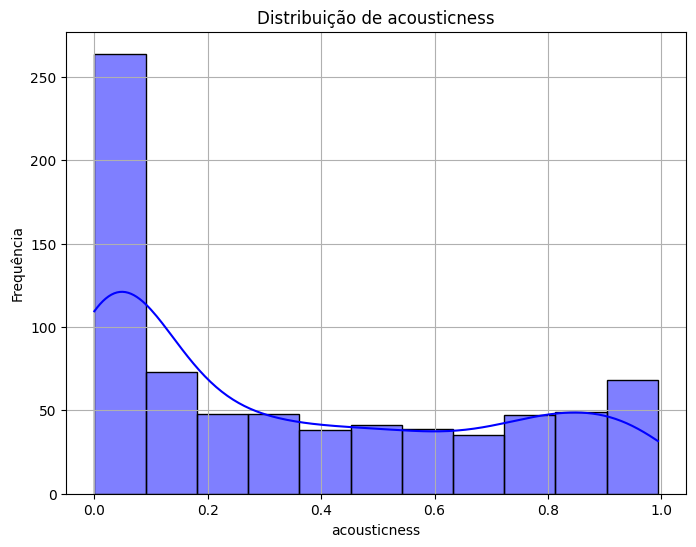


Análise da variável: danceability
  - Média: 0.5964386666666667
  - Mediana: 0.606
  - Moda: 0.525
  - Desvio Padrão: 0.172036411671512
  - Alcance: 0.879
  - Valores únicos: 458
  - Valores nulos: 0
  - Valores duplicados: 292


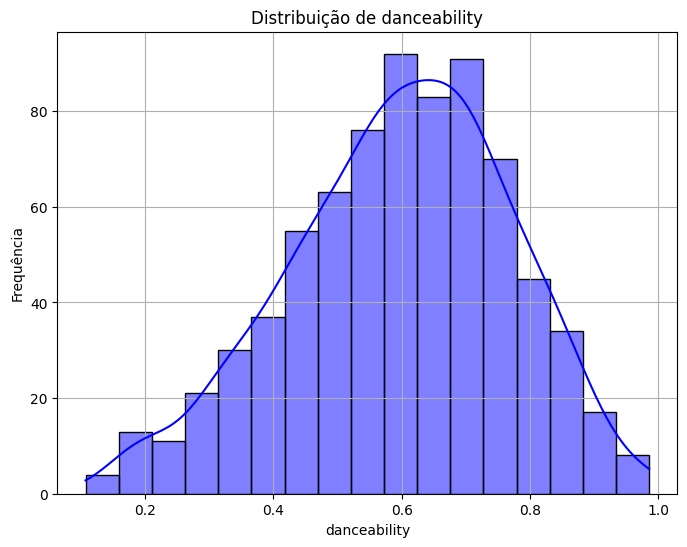


Análise da variável: duration
  - Média: 220112.73333333334
  - Mediana: 215108.5
  - Moda: 213440
  - Desvio Padrão: 65587.69048284946
  - Alcance: 641520
  - Valores únicos: 717
  - Valores nulos: 0
  - Valores duplicados: 33


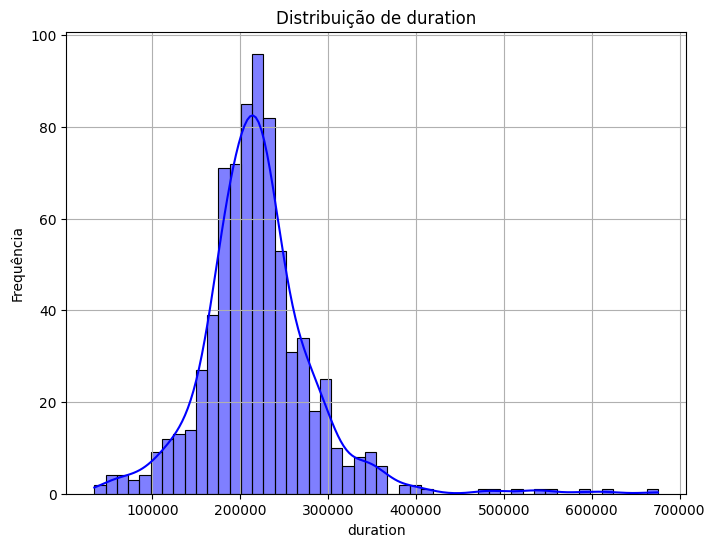


Análise da variável: energy
  - Média: 0.5941879333333333
  - Mediana: 0.6315
  - Moda: 0.666
  - Desvio Padrão: 0.25330130299281806
  - Alcance: 0.98575
  - Valores únicos: 502
  - Valores nulos: 0
  - Valores duplicados: 248


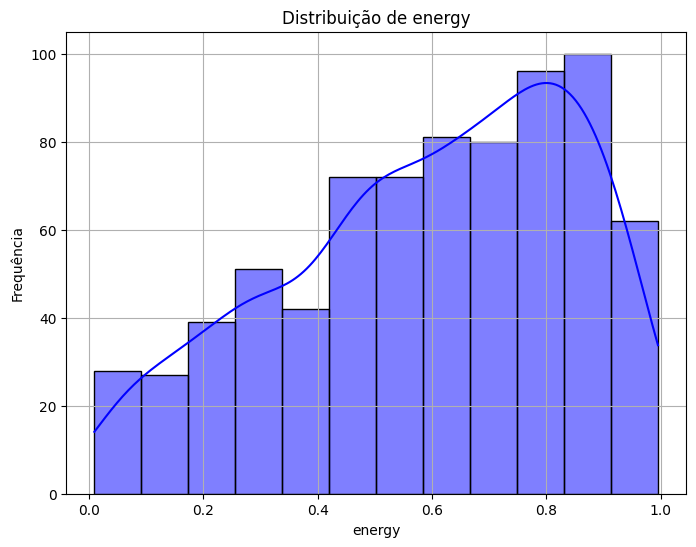


Análise da variável: instrumentalness
  - Média: 0.10024481392
  - Mediana: 1.02e-05
  - Moda: 0.0
  - Desvio Padrão: 0.25992145476369927
  - Alcance: 0.967
  - Valores únicos: 431
  - Valores nulos: 0
  - Valores duplicados: 319


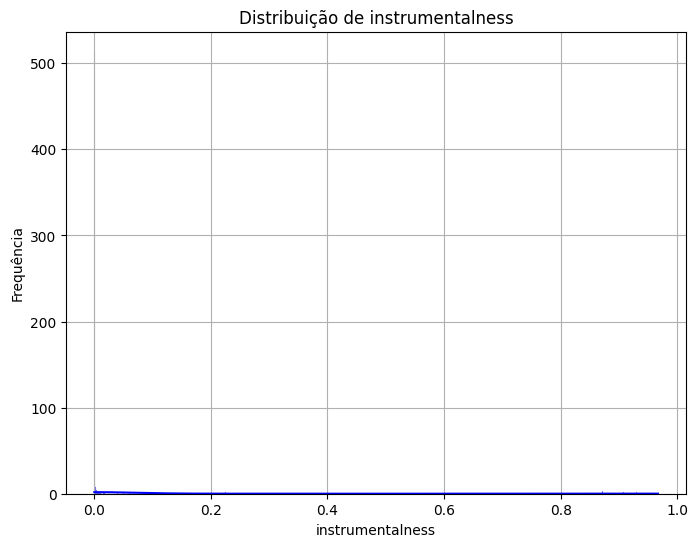


Análise da variável: key
  - Média: 4.8293333333333335
  - Mediana: 5.0
  - Moda: 0
  - Desvio Padrão: 3.6360005806543643
  - Alcance: 11
  - Valores únicos: 12
  - Valores nulos: 0
  - Valores duplicados: 738


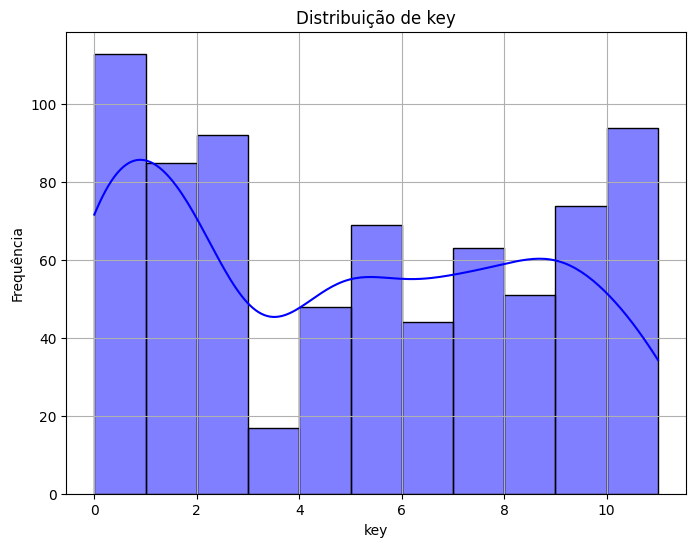


Análise da variável: liveness
  - Média: 0.20337613333333332
  - Mediana: 0.129
  - Moda: 0.102
  - Desvio Padrão: 0.1776086158691543
  - Alcance: 0.955
  - Valores únicos: 445
  - Valores nulos: 0
  - Valores duplicados: 305


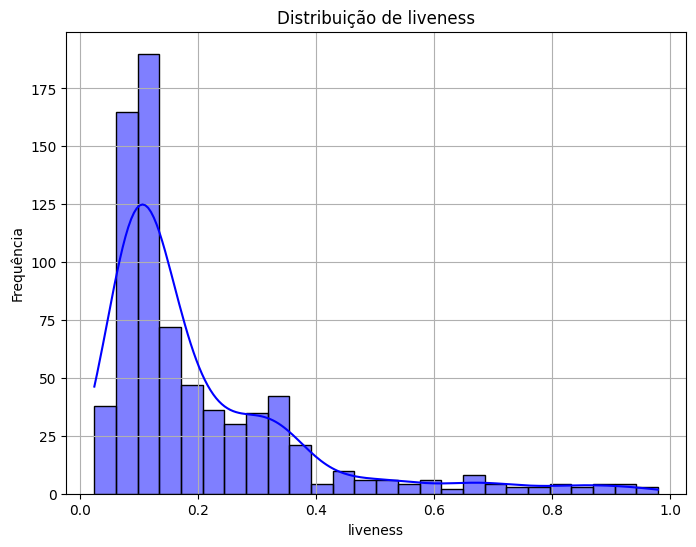


Análise da variável: loudness
  - Média: -8.509338666666668
  - Mediana: -7.27
  - Moda: -7.273
  - Desvio Padrão: 5.039488426627019
  - Alcance: 29.067999999999998
  - Valores únicos: 710
  - Valores nulos: 0
  - Valores duplicados: 40


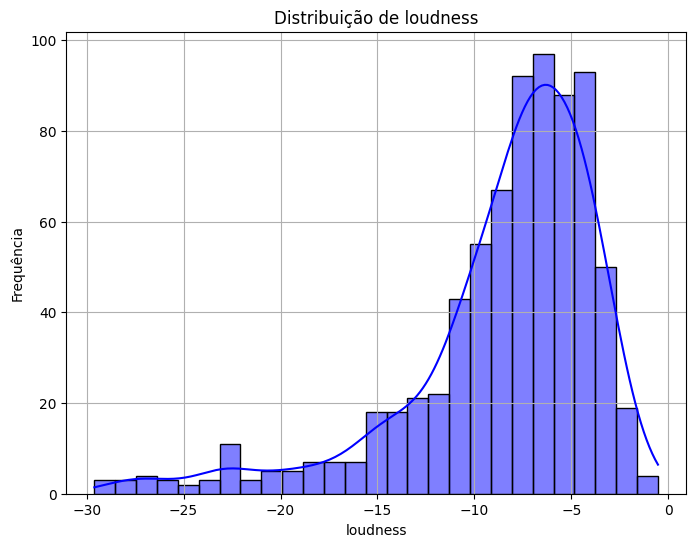


Análise da variável: mode
  - Média: 0.7413333333333333
  - Mediana: 1.0
  - Moda: 1
  - Desvio Padrão: 0.43819429618663935
  - Alcance: 1
  - Valores únicos: 2
  - Valores nulos: 0
  - Valores duplicados: 748


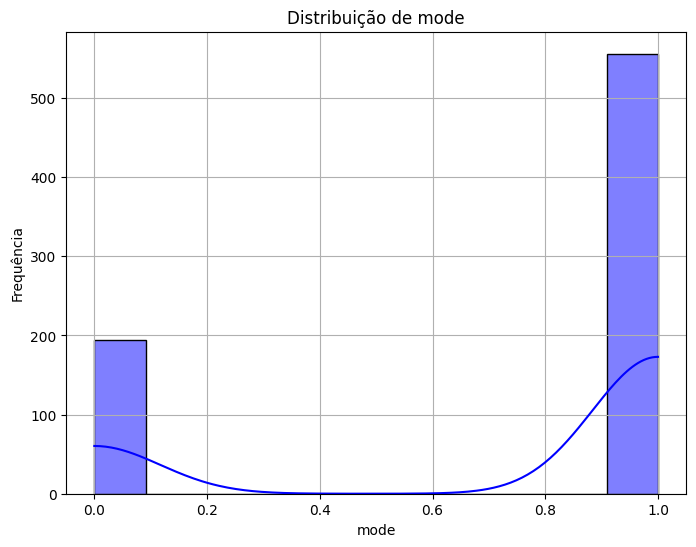


Análise da variável: speechiness
  - Média: 0.09896626666666668
  - Mediana: 0.04875
  - Moda: 0.0349
  - Desvio Padrão: 0.10471451593989692
  - Alcance: 0.6976
  - Valores únicos: 457
  - Valores nulos: 0
  - Valores duplicados: 293


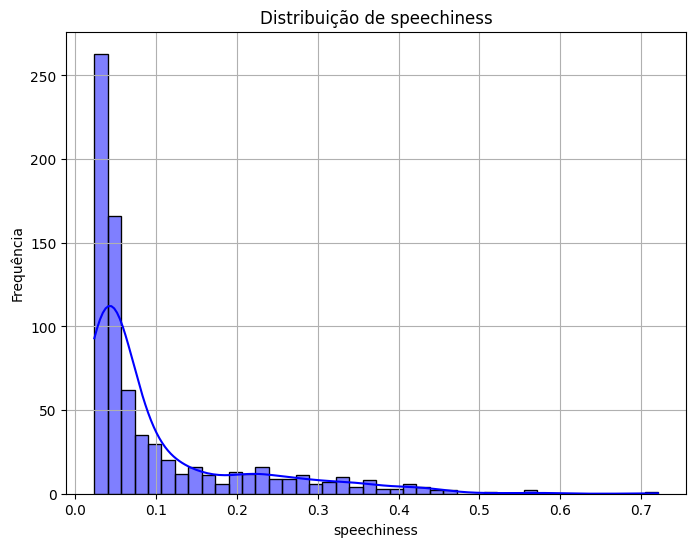


Análise da variável: tempo
  - Média: 120.40576133333333
  - Mediana: 120.1045
  - Moda: 89.019
  - Desvio Padrão: 28.37811642083557
  - Alcance: 148.41500000000002
  - Valores únicos: 729
  - Valores nulos: 0
  - Valores duplicados: 21


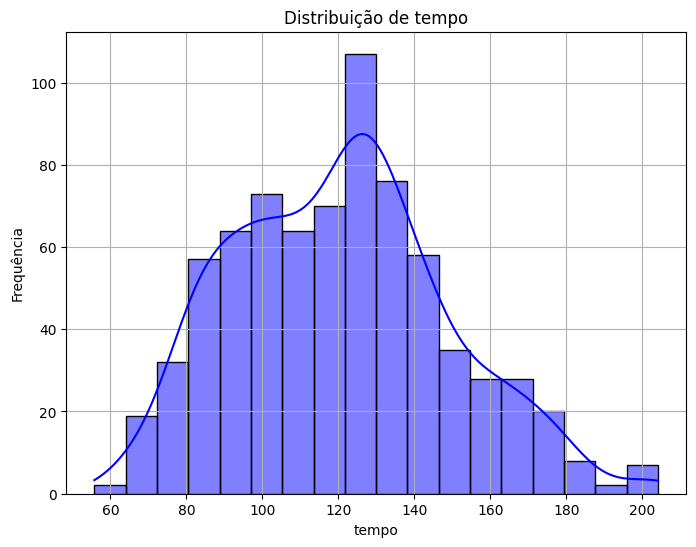


Análise da variável: time_signature
  - Média: 3.9026666666666667
  - Mediana: 4.0
  - Moda: 4
  - Desvio Padrão: 0.40009122235288375
  - Alcance: 4
  - Valores únicos: 4
  - Valores nulos: 0
  - Valores duplicados: 746


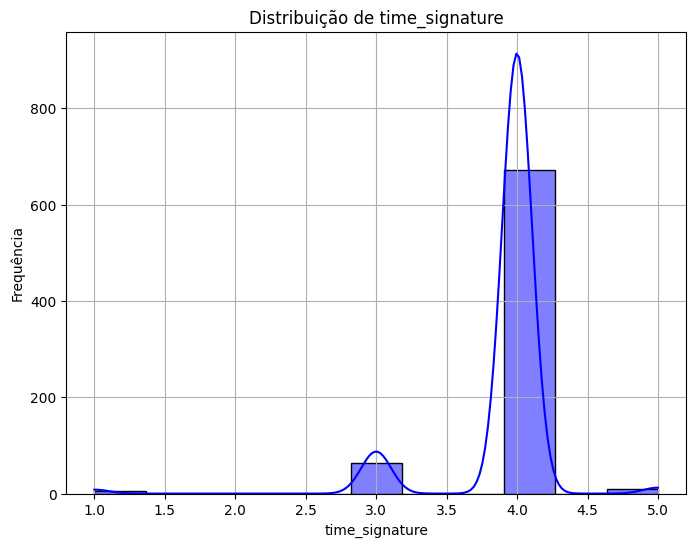


Análise da variável: valence
  - Média: 0.4973214666666667
  - Mediana: 0.483
  - Moda: 0.199
  - Desvio Padrão: 0.23961490066356228
  - Alcance: 0.9418
  - Valores únicos: 487
  - Valores nulos: 0
  - Valores duplicados: 263


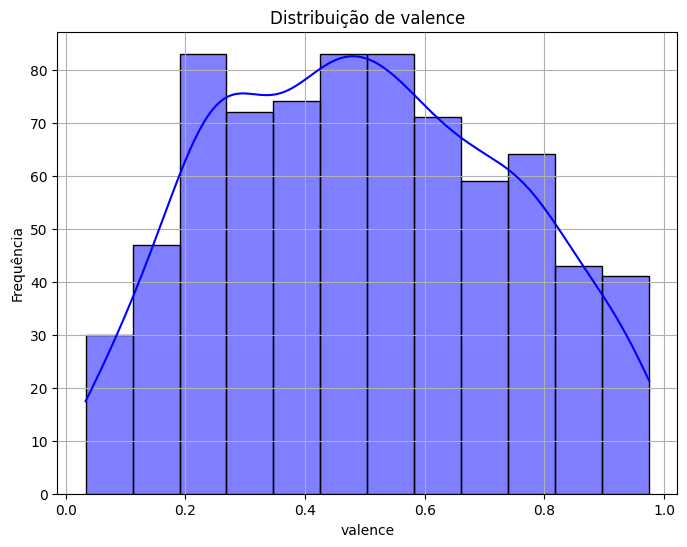

In [ ]:
# Iterando sobre as colunas numéricas do dataset
for column in music.select_dtypes(include=np.number).columns:
    mean_value = music[column].mean()
    median_value = music[column].median()
    mode_value = music[column].mode()[0]
    std_dev = music[column].std()
    data_range = music[column].max() - music[column].min()

    # Exibindo os resultados
    print(f"\nAnálise da variável: {column}")
    print(f"  - Média: {mean_value}")
    print(f"  - Mediana: {median_value}")
    print(f"  - Moda: {mode_value}")
    print(f"  - Desvio Padrão: {std_dev}")
    print(f"  - Alcance: {data_range}")
    print(f"  - Valores únicos: {music[column].nunique()}")
    print(f"  - Valores nulos: {music[column].isnull().sum()}")
    print(f"  - Valores duplicados: {music[column].duplicated().sum()}")

    # Gráfico da distribuição (histograma com linha KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=music, x=column, kde=True, color='blue')
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

In [ ]:
# Analisando os dados faltantes por variável
for col in music.columns:
    percent_missing = music[col].isna().mean() * 100
    print(f"Coluna: {col} - Porcentagem de valores faltantes: {percent_missing:.2f}%")

# Calculando e exibindo o número de dados faltantes por registro
missing_per_row = music.isna().sum(axis=1)
missing_percent_per_row = (missing_per_row / len(music.columns)) * 100

# Exibindo o resultado
print("Dados faltantes por registro:")
print(missing_per_row)
print("\nPorcentagem de dados faltantes por registro:")
print(missing_percent_per_row)

Coluna: acousticness - Porcentagem de valores faltantes: 0.00%
Coluna: danceability - Porcentagem de valores faltantes: 0.00%
Coluna: duration - Porcentagem de valores faltantes: 0.00%
Coluna: energy - Porcentagem de valores faltantes: 0.00%
Coluna: instrumentalness - Porcentagem de valores faltantes: 0.00%
Coluna: key - Porcentagem de valores faltantes: 0.00%
Coluna: liveness - Porcentagem de valores faltantes: 0.00%
Coluna: loudness - Porcentagem de valores faltantes: 0.00%
Coluna: mode - Porcentagem de valores faltantes: 0.00%
Coluna: speechiness - Porcentagem de valores faltantes: 0.00%
Coluna: tempo - Porcentagem de valores faltantes: 0.00%
Coluna: time_signature - Porcentagem de valores faltantes: 0.00%
Coluna: valence - Porcentagem de valores faltantes: 0.00%
Dados faltantes por registro:
0      0
1      0
2      0
3      0
4      0
      ..
745    0
746    0
747    0
748    0
749    0
Length: 750, dtype: int64

Porcentagem de dados faltantes por registro:
0      0.0
1      0.0


In [ ]:
# Verificando se há o caracter '-' explicitamente
columns_with_special_char = music.apply(lambda col: col.astype(str).str.strip().eq('-').any())

print("Colunas com caracteres especiais:")
print(columns_with_special_char[columns_with_special_char])

Colunas com caracteres especiais:
Series([], dtype: bool)


Não há valores atípicos na coluna acousticness.


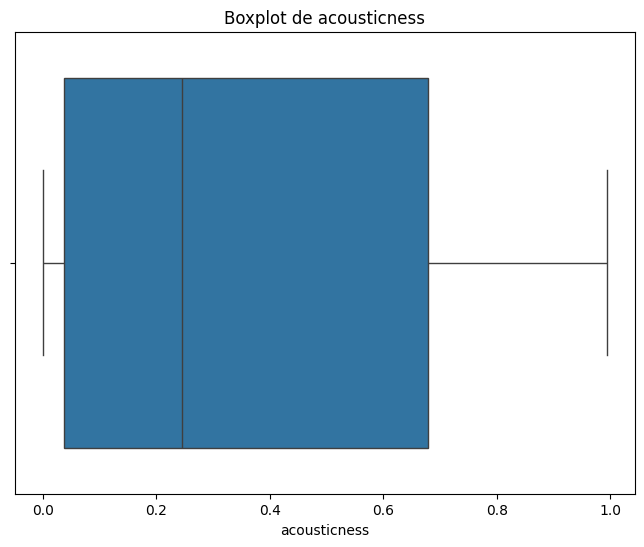

Valores atípicos na coluna danceability:
604    0.107
Name: danceability, dtype: float64
Número de outliers na coluna danceability: 1


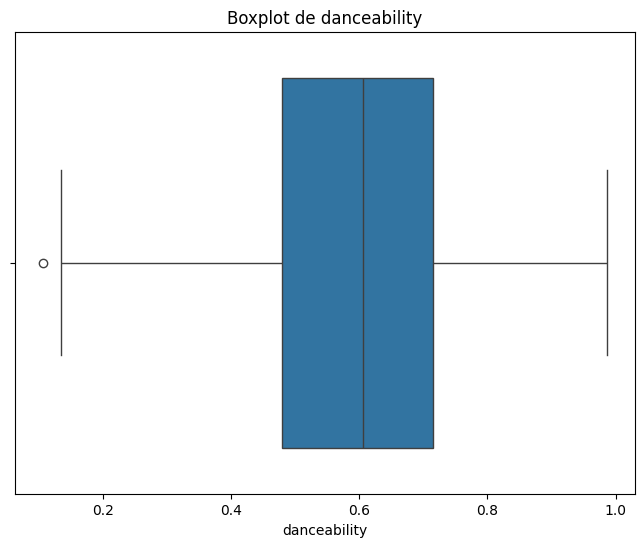

Valores atípicos na coluna duration:
8      366179
22     361613
45      86813
47     403280
68     520661
70     344867
81     348760
117     91840
140    334853
163     75413
173    547880
197    592000
206    366773
215     46107
226     70352
241    675360
247    340867
262     93240
274    353920
293    366227
339    538800
351     55653
384     67213
388    482333
401    348640
405     79595
420    393333
445    334067
449     58671
488     33840
533    390573
543    343493
557    335667
560    362354
568    339667
571    411520
584    347707
589    350827
618    337413
631    387827
632     62622
651     56331
653    349080
666     87573
678    337228
685     81760
699    483667
700     48093
707     66481
708    352000
713    357955
730    618400
745    333827
Name: duration, dtype: int64
Número de outliers na coluna duration: 53


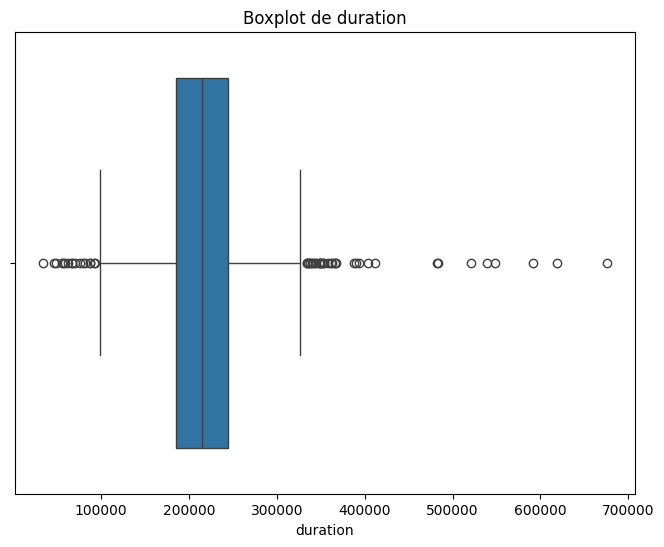

Não há valores atípicos na coluna energy.


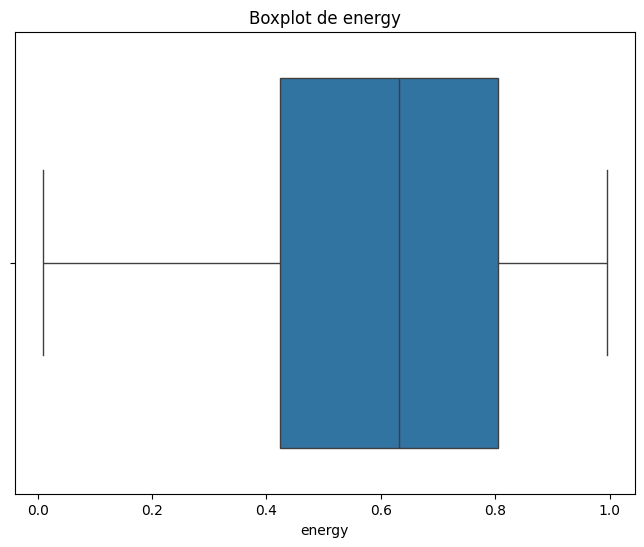

Valores atípicos na coluna instrumentalness:
0      0.81600
3      0.21000
7      0.60900
8      0.83900
9      0.08830
        ...   
730    0.90800
736    0.52000
742    0.05030
744    0.00626
746    0.00602
Name: instrumentalness, Length: 162, dtype: float64
Número de outliers na coluna instrumentalness: 162


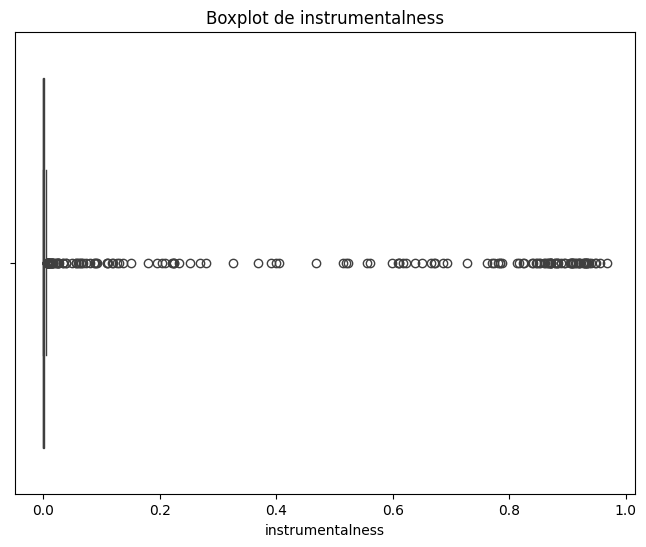

Não há valores atípicos na coluna key.


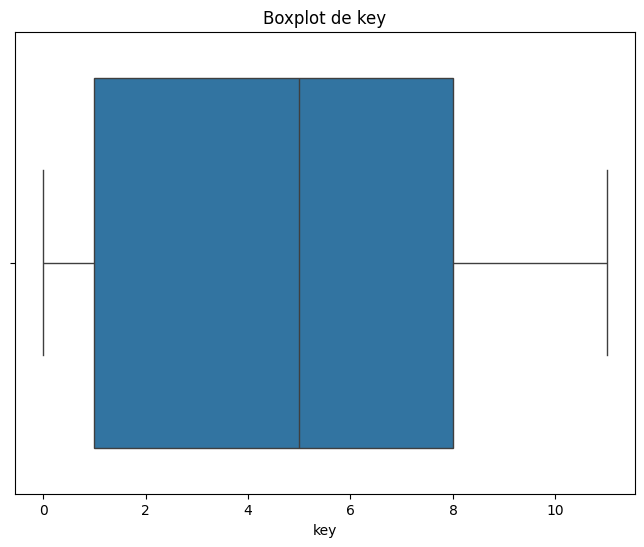

Valores atípicos na coluna liveness:
30     0.666
68     0.979
78     0.692
119    0.839
131    0.684
132    0.966
133    0.748
137    0.716
150    0.858
159    0.744
174    0.651
178    0.684
183    0.860
188    0.584
217    0.725
223    0.546
227    0.785
236    0.765
237    0.610
249    0.527
263    0.651
266    0.673
271    0.924
281    0.931
310    0.832
355    0.528
421    0.922
425    0.873
438    0.875
453    0.905
455    0.970
467    0.659
486    0.579
490    0.540
495    0.700
498    0.675
500    0.797
508    0.546
529    0.542
538    0.825
552    0.718
586    0.531
594    0.611
600    0.831
618    0.922
623    0.637
637    0.778
643    0.583
663    0.636
678    0.874
727    0.583
Name: liveness, dtype: float64
Número de outliers na coluna liveness: 51


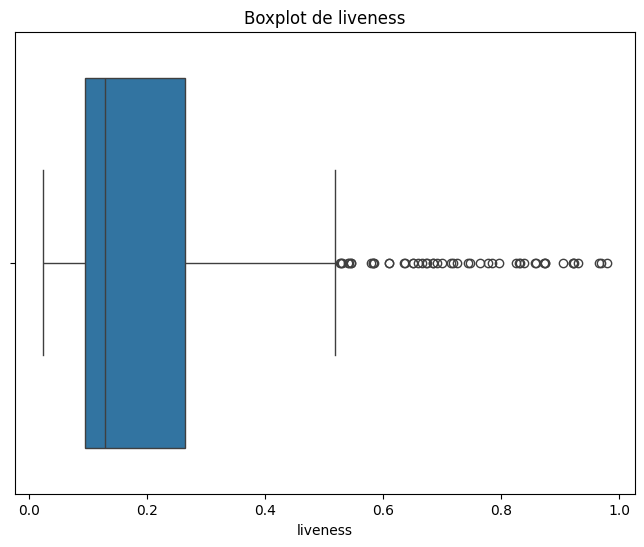

Valores atípicos na coluna loudness:
18    -23.072
25    -25.257
32    -22.533
35    -27.385
47    -27.127
59    -19.465
69    -17.979
95    -27.817
97    -24.028
112   -22.358
120   -27.456
155   -18.487
209   -19.385
233   -22.358
241   -22.509
248   -23.758
261   -20.153
262   -18.641
276   -26.586
297   -23.072
304   -18.236
311   -19.543
339   -26.074
345   -21.306
388   -22.938
408   -23.571
410   -24.419
419   -21.133
466   -17.848
483   -18.539
496   -22.826
533   -27.473
557   -20.631
559   -28.550
560   -27.421
571   -25.335
593   -22.807
620   -29.601
622   -17.988
632   -19.265
640   -25.777
666   -19.798
687   -22.027
694   -22.814
699   -28.841
703   -20.931
708   -19.978
717   -22.696
730   -20.210
Name: loudness, dtype: float64
Número de outliers na coluna loudness: 49


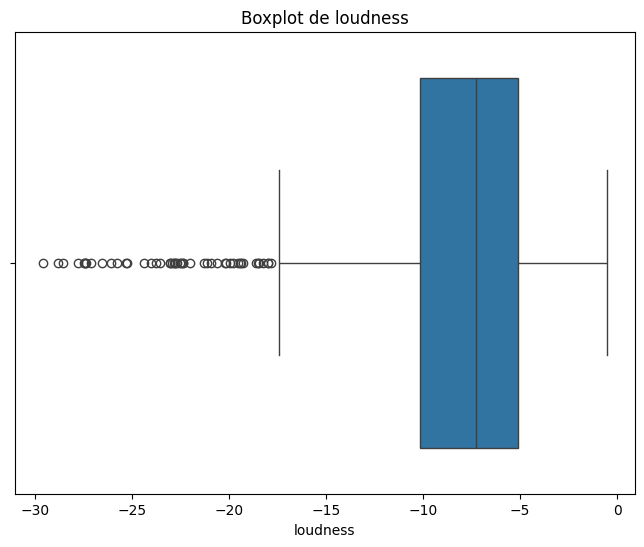

Não há valores atípicos na coluna mode.


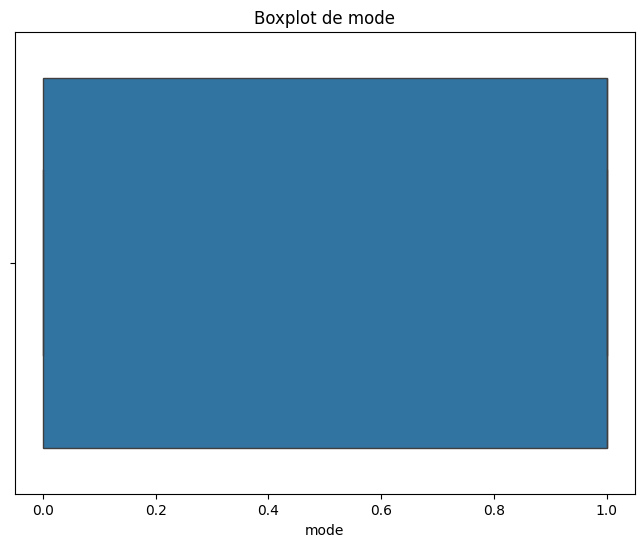

Valores atípicos na coluna speechiness:
10     0.296
19     0.416
21     0.357
22     0.335
23     0.336
       ...  
731    0.367
732    0.335
735    0.327
736    0.337
743    0.351
Name: speechiness, Length: 96, dtype: float64
Número de outliers na coluna speechiness: 96


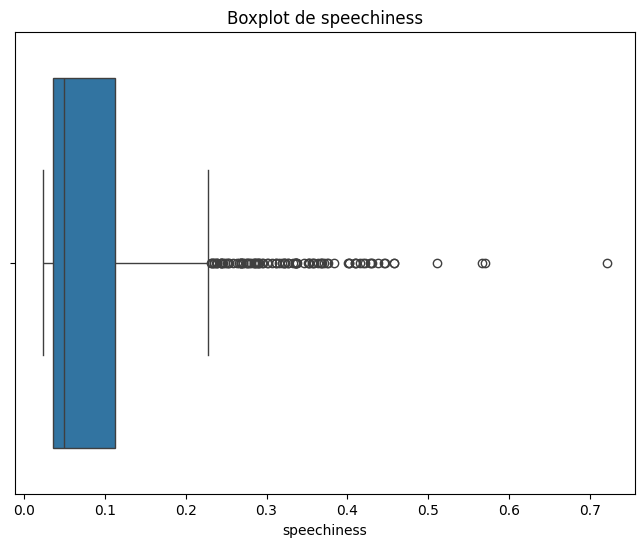

Valores atípicos na coluna tempo:
10     199.512
195    201.843
350    203.927
377    203.669
649    201.800
654    203.988
743    204.162
Name: tempo, dtype: float64
Número de outliers na coluna tempo: 7


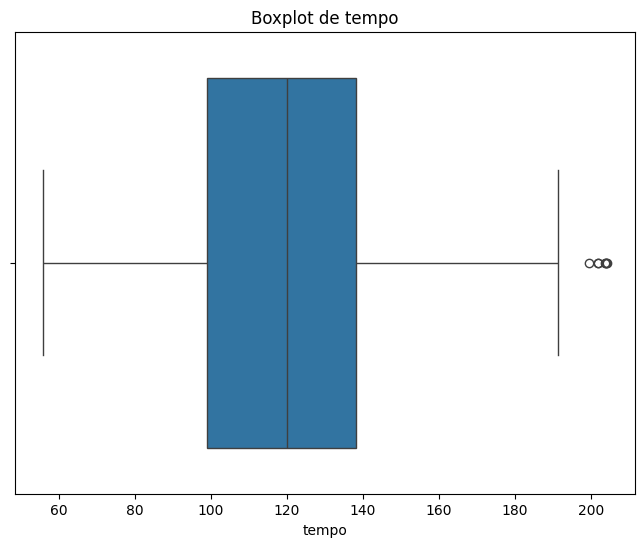

Valores atípicos na coluna time_signature:
8      3
34     5
35     3
53     3
54     1
      ..
696    3
699    3
703    3
706    3
737    3
Name: time_signature, Length: 79, dtype: int64
Número de outliers na coluna time_signature: 79


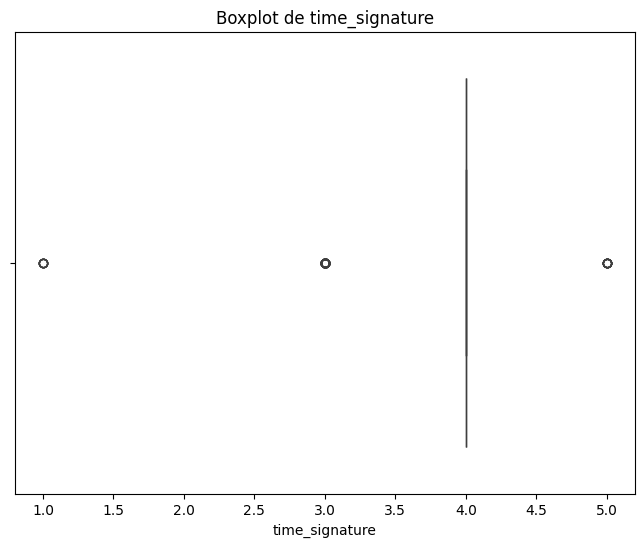

Não há valores atípicos na coluna valence.


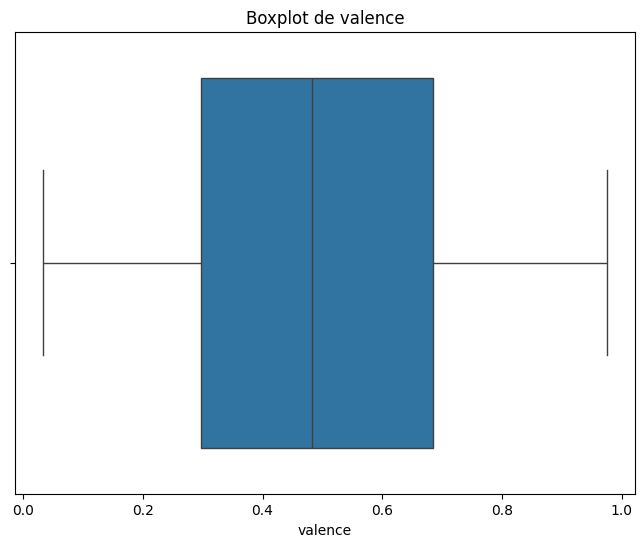

In [ ]:
#Deteção de outliers pelo método IQR
def detect_outliers_iqr(music):
    Q1 = music.quantile(0.25)
    Q3 = music.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = music[(music < lower_bound) | (music > upper_bound)]
    return outliers

# Função combinada para detectar outliers e visualizar boxplots
def detect_and_plot_outliers(music):
    for col in music.select_dtypes(include=np.number).columns:
        # Aplicar o método IQR para detectar outliers
        outliers = detect_outliers_iqr(music[col])

        # Exibir outliers, se houver
        if not outliers.empty:
            print(f"Valores atípicos na coluna {col}:")
            print(outliers)
            print(f"Número de outliers na coluna {col}: {len(outliers)}")
        else:
            print(f"Não há valores atípicos na coluna {col}.")

        # Plotar o boxplot da coluna
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=music[col])
        plt.title(f"Boxplot de {col}")
        plt.show()

# Chamar a função otimizada
detect_and_plot_outliers(music)

Outliers identificados pelo Z-Score:
     acousticness  danceability  duration  energy  instrumentalness  key  \
68            NaN           NaN  520661.0     NaN               NaN  NaN   
173           NaN           NaN  547880.0     NaN               NaN  NaN   
197           NaN           NaN  592000.0     NaN               NaN  NaN   
241           NaN           NaN  675360.0     NaN             0.934  NaN   
339           NaN           NaN  538800.0     NaN               NaN  NaN   
..            ...           ...       ...     ...               ...  ...   
83            NaN           NaN       NaN     NaN               NaN  NaN   
316           NaN           NaN       NaN     NaN               NaN  NaN   
433           NaN           NaN       NaN     NaN               NaN  NaN   
502           NaN           NaN       NaN     NaN               NaN  NaN   
593           NaN           NaN       NaN     NaN               NaN  NaN   

     liveness  loudness  mode  speechiness  tempo 

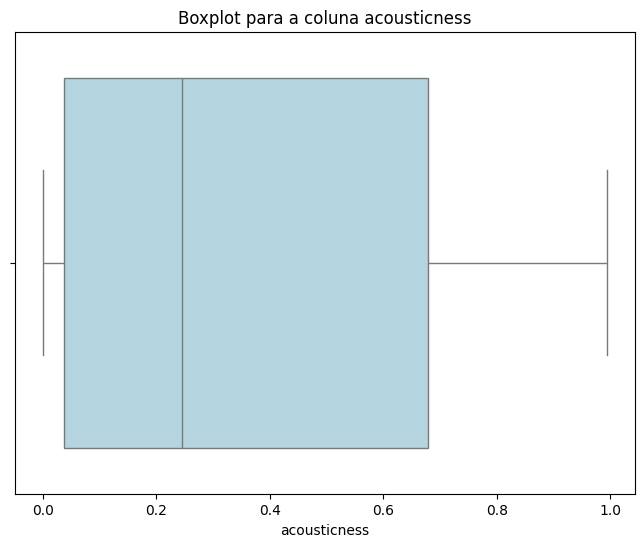

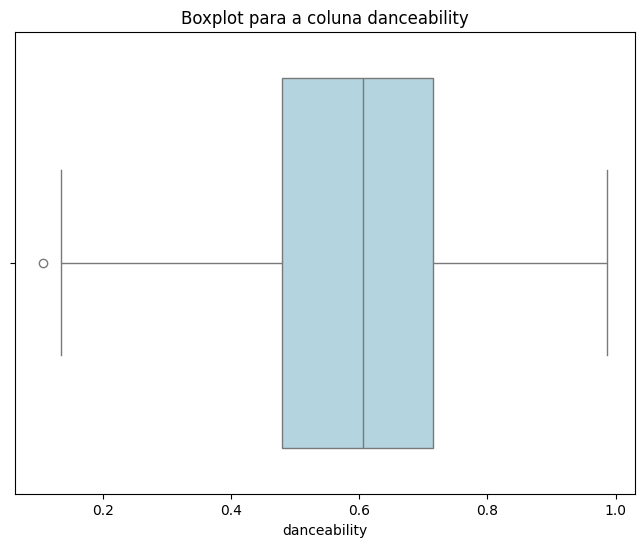

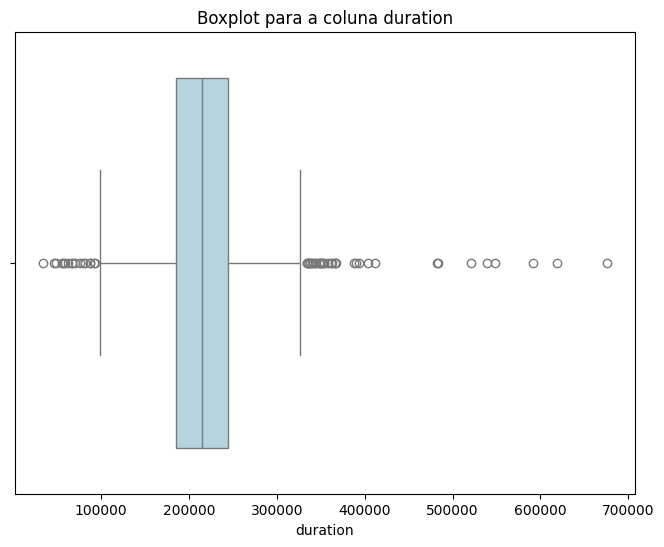

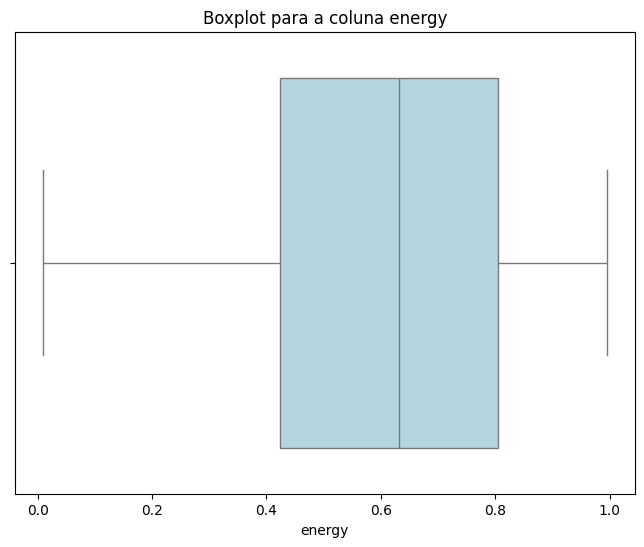

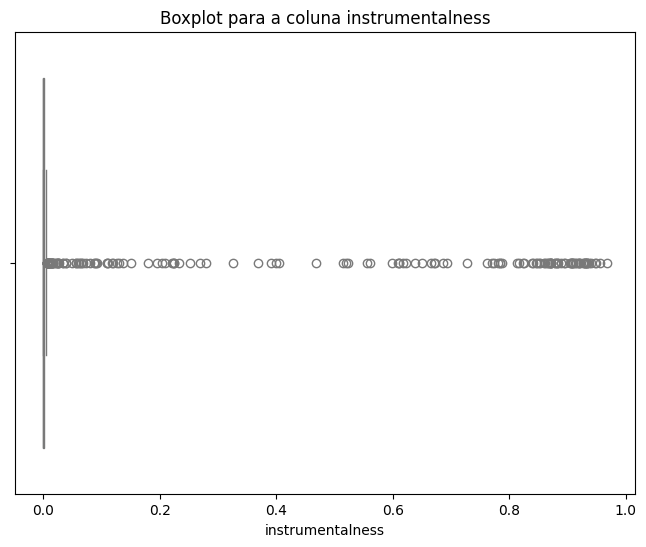

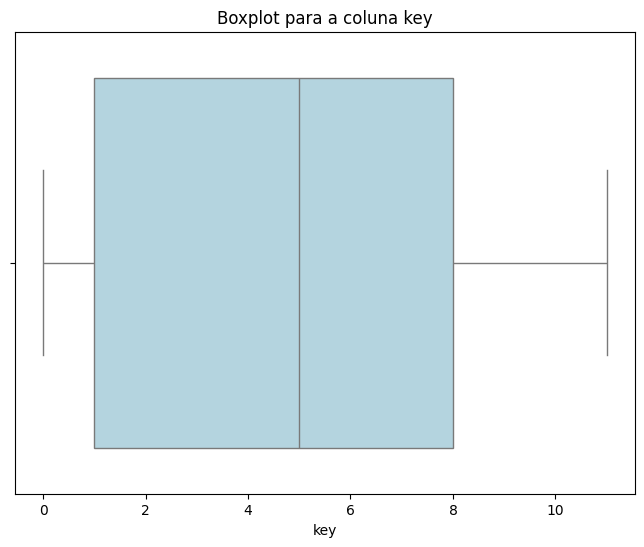

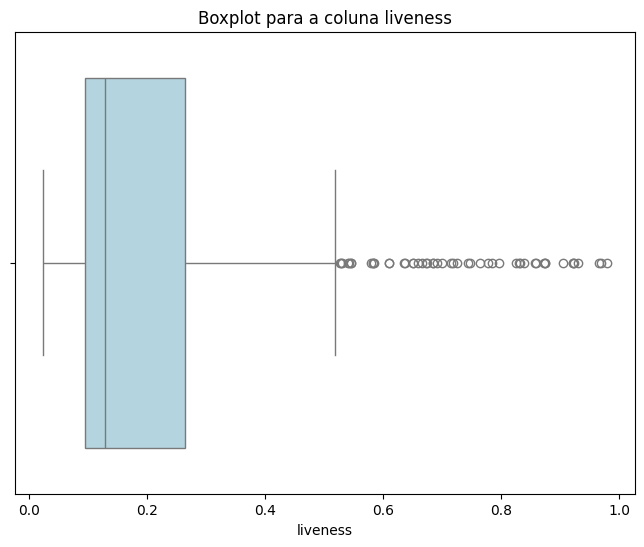

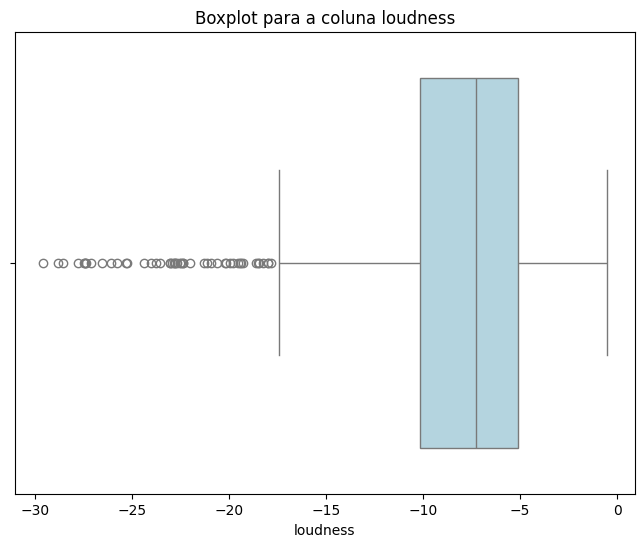

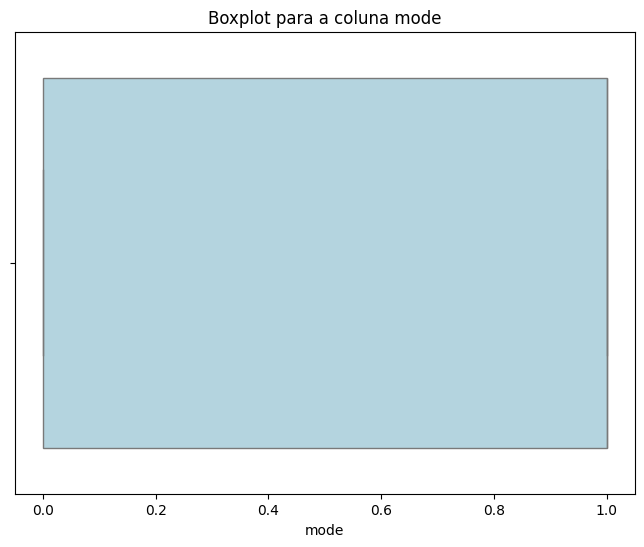

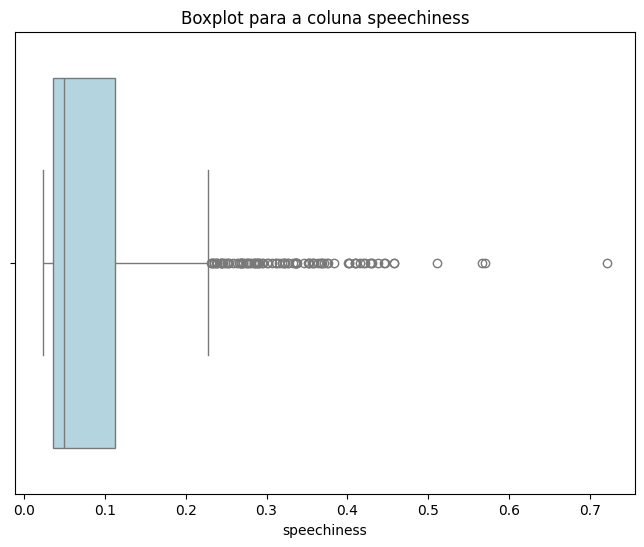

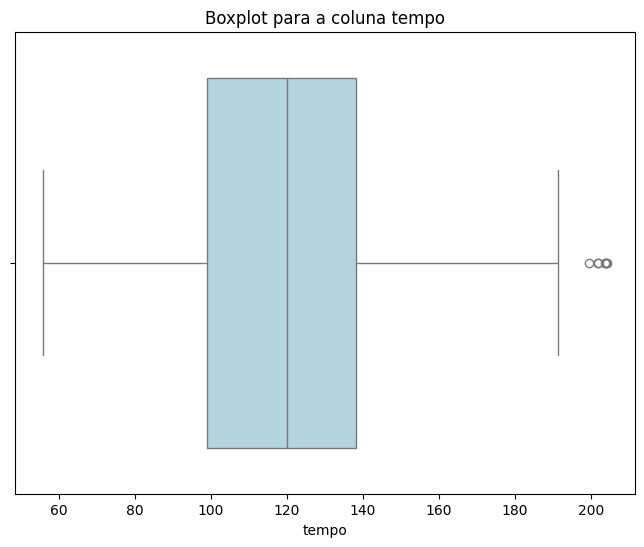

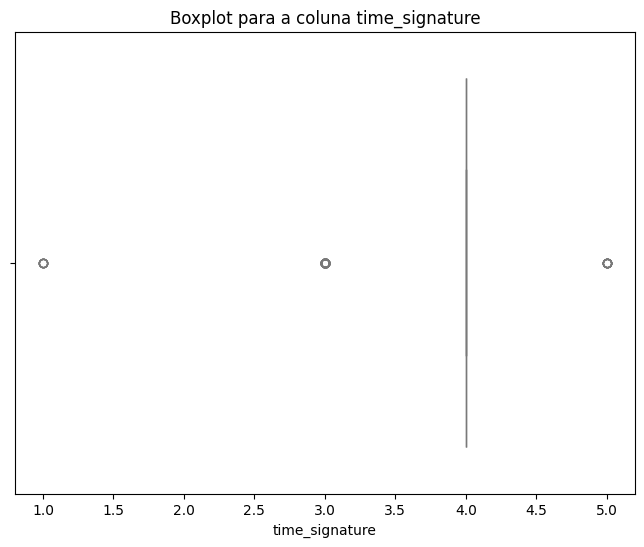

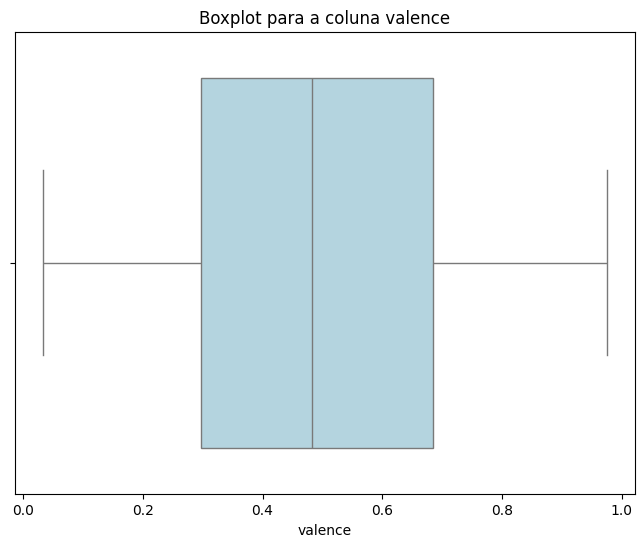

In [ ]:
# Função para detectar outliers usando o Z-Score
def detect_outliers_zscore(music, threshold=3):
    outliers = pd.DataFrame()
    for col in music.select_dtypes(include=np.number).columns:
        z_scores = np.abs(stats.zscore(music[col].dropna()))
        outliers_in_col = music[col][z_scores > threshold]
        outliers = pd.concat([outliers, outliers_in_col], axis=1)

    return outliers

outliers_zscore = detect_outliers_zscore(music)
print("Outliers identificados pelo Z-Score:")
print(outliers_zscore)


<Figure size 1200x800 with 0 Axes>

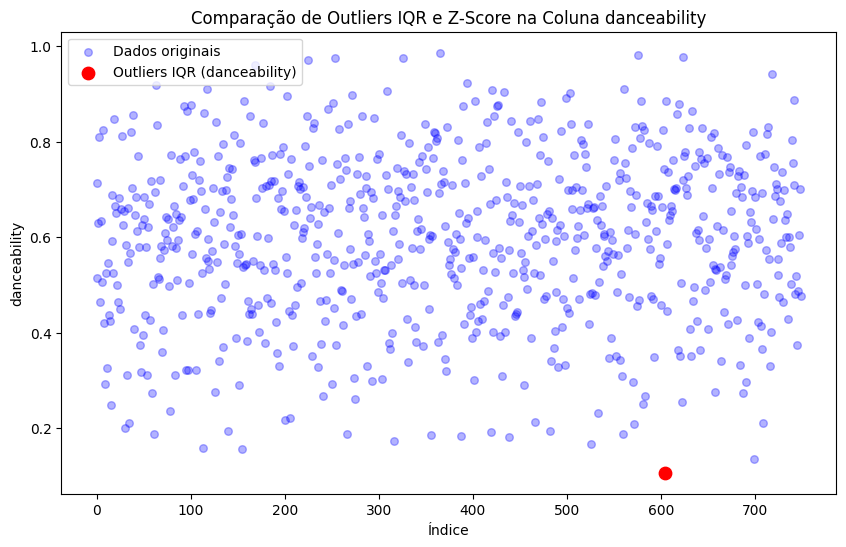

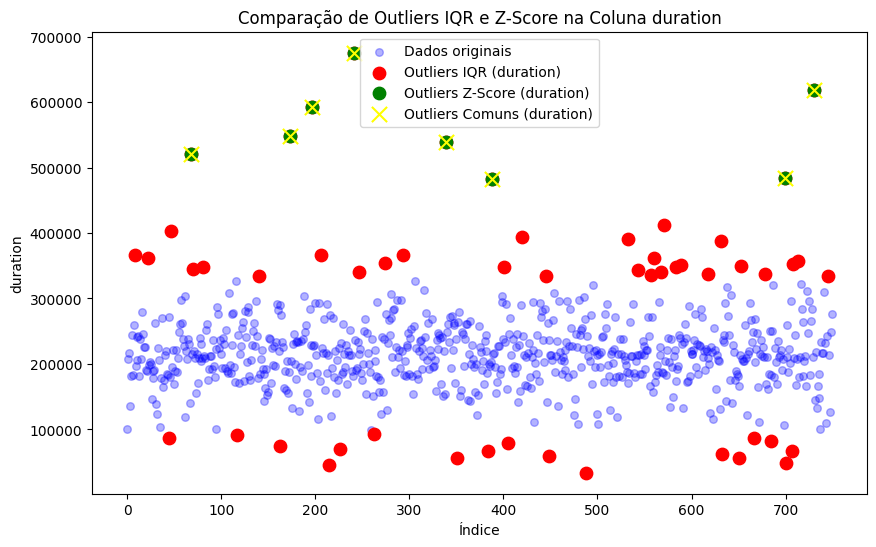

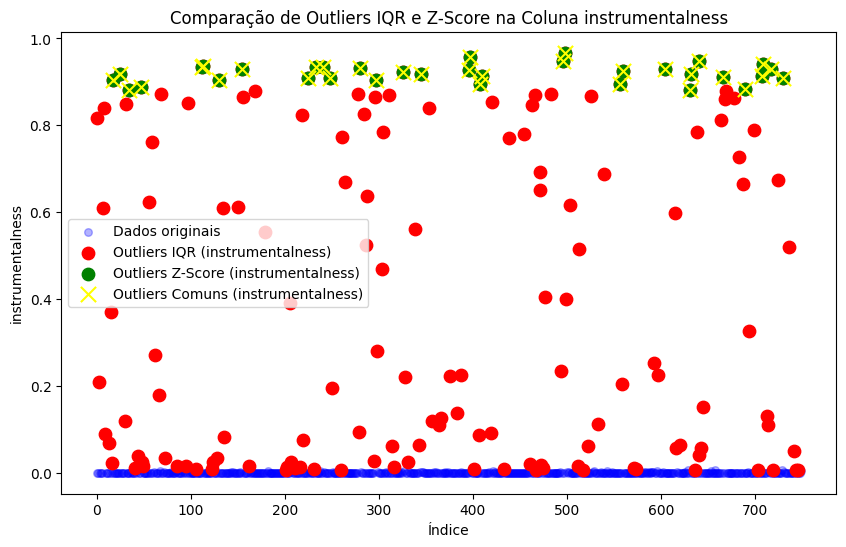

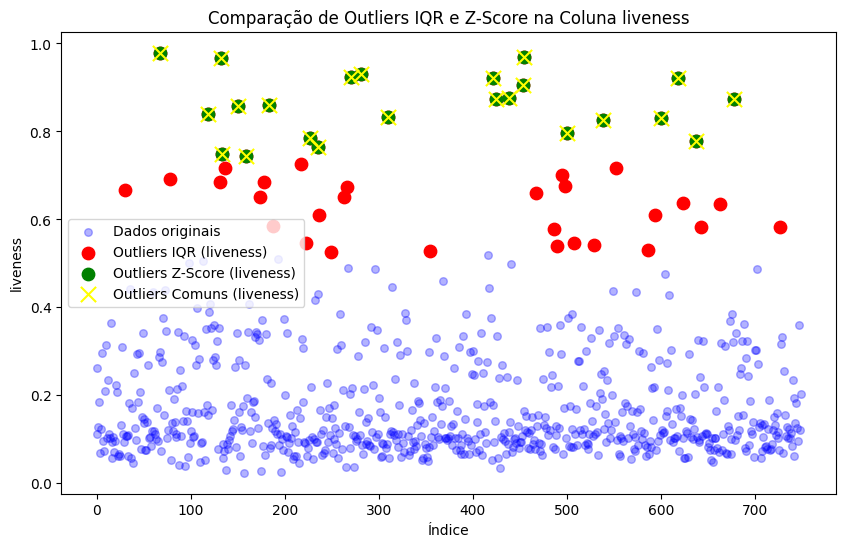

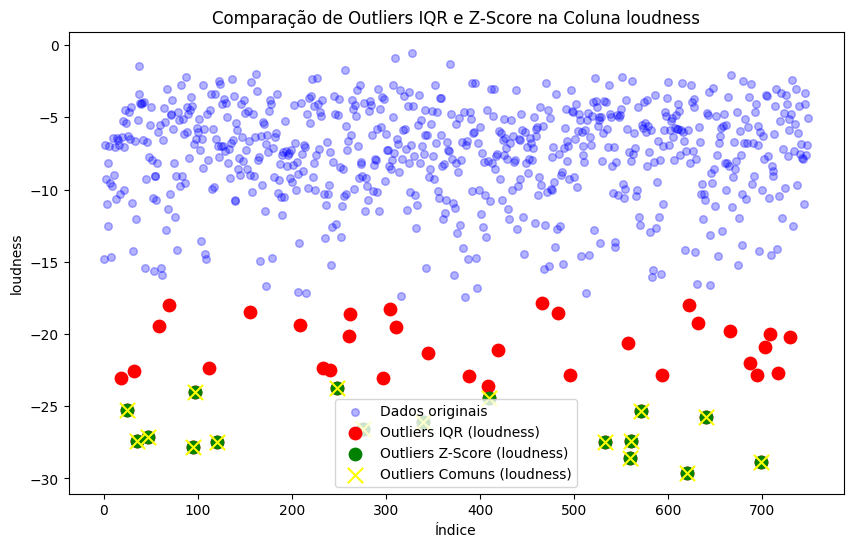

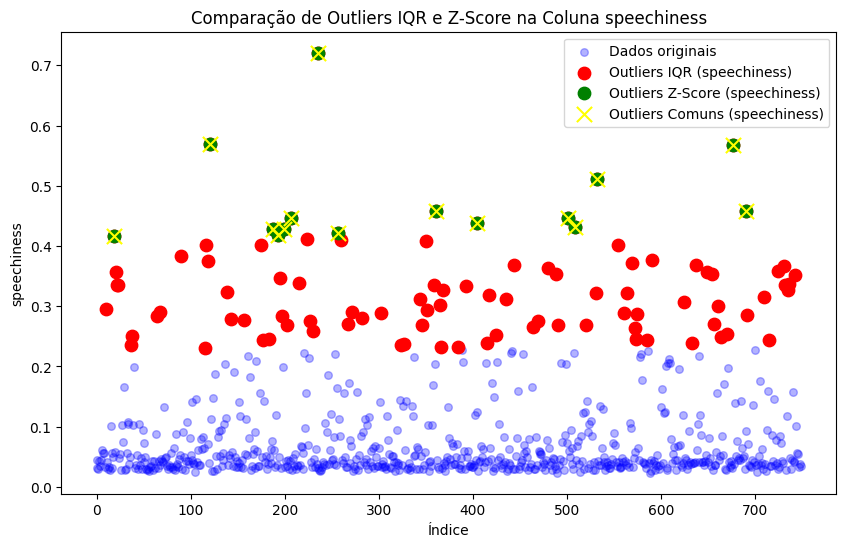

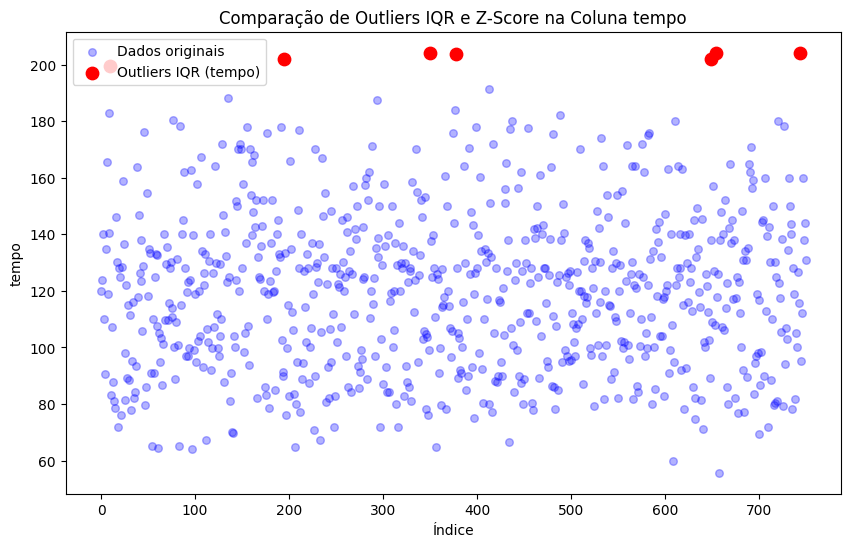

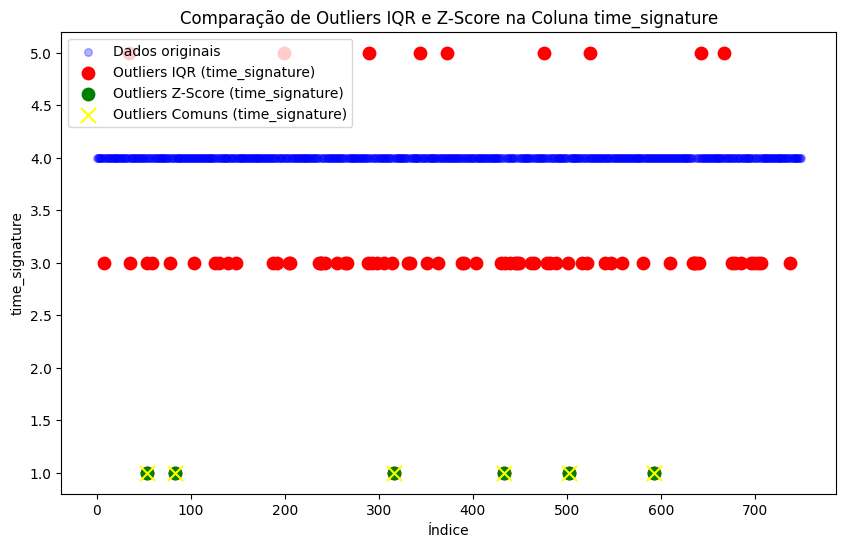

In [ ]:
# Função para gerar gráfico comparando outliers apenas nas colunas que possuem outliers
def plot_combined_outliers_with_outliers_only(music, outliers_zscore, iqr_function):
    plt.figure(figsize=(12, 8))

    # Iterar sobre as colunas numéricas
    numeric_columns = music.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        # Obter outliers pelo método IQR
        outliers_iqr = iqr_function(music[col])

        # Obter outliers pelo método Z-Score para a coluna específica
        outliers_zscore_col = outliers_zscore[col].dropna()

        # Verificar se há outliers detectados por qualquer um dos métodos
        if not outliers_iqr.empty or not outliers_zscore_col.empty:
            plt.figure(figsize=(10, 6))

            # Plotar todos os dados da coluna
            plt.scatter(music.index, music[col], color='blue', alpha=0.3, label='Dados originais', s=30)

            # Plotar outliers detectados pelo IQR (vermelho)
            if not outliers_iqr.empty:
                plt.scatter(outliers_iqr.index, outliers_iqr, color='red', label=f'Outliers IQR ({col})', s=80)

            # Plotar outliers detectados pelo Z-Score (verde)
            if not outliers_zscore_col.empty:
                plt.scatter(outliers_zscore_col.index, outliers_zscore_col, color='green', label=f'Outliers Z-Score ({col})', s=80)

            # Destacar outliers comuns em ambas as detecções (amarelo)
            outliers_comuns = outliers_iqr.index.intersection(outliers_zscore_col.index)
            if not outliers_comuns.empty:
                plt.scatter(outliers_comuns, music[col].loc[outliers_comuns], color='yellow', label=f'Outliers Comuns ({col})', s=120, marker='x')

            # Configurações de título e legendas
            plt.title(f"Comparação de Outliers IQR e Z-Score na Coluna {col}")
            plt.xlabel('Índice')
            plt.ylabel(col)
            plt.legend(loc='best')
            plt.show()

# Chamar a função para gerar o gráfico apenas nas colunas com outliers
plot_combined_outliers_with_outliers_only(music, outliers_zscore, detect_outliers_iqr)

In [ ]:
# Aplicar winsorização (limitando os extremos)
def winsorize_outliers(music):
    for col in music.select_dtypes(include=np.number).columns:
        music[col] = winsorize(music[col], limits=[0.05, 0.05])  # Limita os outliers nos 5% superiores e inferiores
    return music

# Aplicar winsorização
music_winsorized = winsorize_outliers(music)

In [ ]:
# Substituir outliers pelo método IQR pelos limites
def replace_outliers_iqr(music, iqr_function):
    for col in music.select_dtypes(include=np.number).columns:
        Q1 = music[col].quantile(0.25)
        Q3 = music[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Substituir outliers pelos limites do IQR
        music.loc[music[col] < lower_bound, col] = lower_bound
        music.loc[music[col] > upper_bound, col] = upper_bound
    return music

In [ ]:
# Função para padronizar os dados (média 0, desvio padrão 1)
def standardize_data(music):
    scaler = StandardScaler()

    # Padronizar apenas as colunas numéricas
    cols_numeriques = music.select_dtypes(include=np.number).columns
    music_standardized = pd.DataFrame(scaler.fit_transform(music[cols_numeriques]), columns=cols_numeriques)

    # Preservar as colunas não numéricas
    cols_non_numeriques = music.select_dtypes(exclude=np.number)
    if not cols_non_numeriques.empty:
        music_standardized = pd.concat([cols_non_numeriques, music_standardized], axis=1)

    return music_standardized

In [ ]:
# Processo completo
def process_music_data(music, iqr_function):
    # 1. Eliminação de duplicados
    size_antes = len(music)
    music = music.drop_duplicates()
    size_despues = len(music)
    print(f"Se eliminaron: {size_antes - size_despues} filas duplicadas")

    # 2. Substituição dos outliers pelos limites do IQR
    music_tratado = replace_outliers_iqr(music, iqr_function)

    # 3. Padronização dos dados
    music_standardized = standardize_data(music_tratado)

    return music_standardized

# Chamar a função completa
music_standardized = process_music_data(music, detect_outliers_iqr)

# Visualizar os dados padronizados e sem duplicados
print(music_standardized.head())

Se eliminaron: 14 filas duplicadas
   acousticness  danceability  duration    energy  instrumentalness       key  \
0      1.064424     -0.522062 -1.892076 -0.311042          1.802472  0.861803   
1     -0.490713      0.729058 -0.218646  0.069262         -0.623619 -0.239868   
2     -0.069841      0.203588 -0.035614 -0.580936         -0.622067  0.035550   
3      0.730114      1.329596 -1.626249 -1.537831          1.802472  0.035550   
4      1.571859     -0.828587 -0.728590 -0.564579         -0.548837  0.310967   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0 -0.583187 -1.636517 -1.677341    -0.582795 -0.021608             0.0   
1  0.546537  0.313593  0.596182    -0.760713  0.133382             0.0   
2 -0.470963 -0.267737  0.596182    -0.799143  0.738259             0.0   
3 -0.044511 -0.691084  0.596182    -0.604145 -0.397486             0.0   
4 -0.903400  0.016880 -1.677341    -0.715166 -1.123285             0.0   

    valence  
0 -1.541838  
1  0.

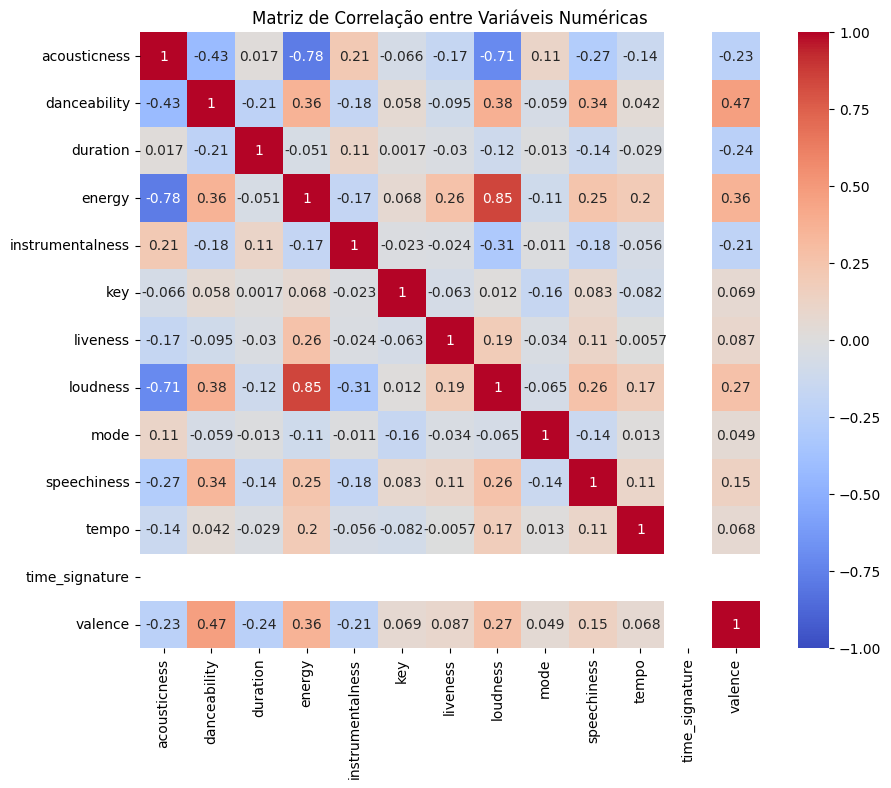

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = music.corr()

# Visualizar a matriz de correlação como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

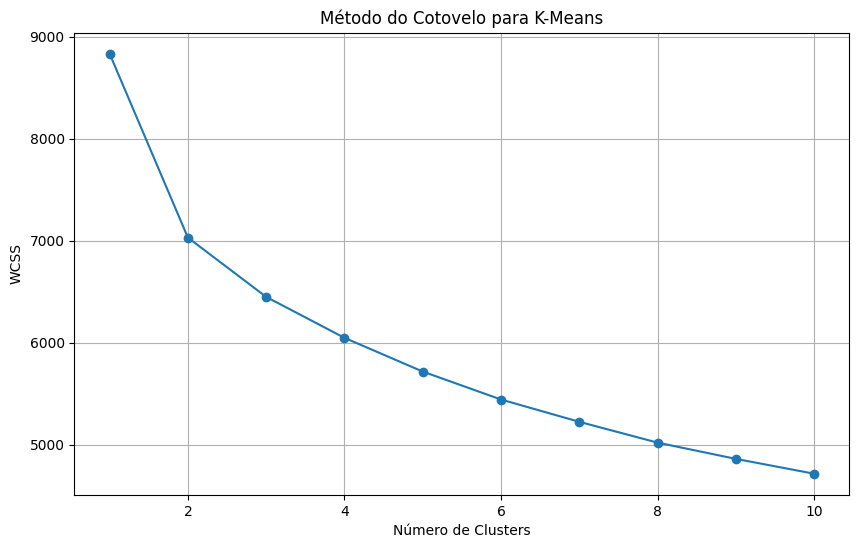

In [ ]:
# Faixa de valores de k (número de clusters) para testar
k_range = range(1, 11)
wcss = []

# Calcular o WCSS para cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(music_standardized)  # Usando os dados padronizados
    wcss.append(kmeans.inertia_)

# Plotar o Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo para K-Means')
plt.grid(True)
plt.show()

In [ ]:
k_ideal = 3  # local de maior dobra, onde a diminuição começa a desacelerar

# Ajustar o K-Means com o valor de k escolhido
kmeans_final = KMeans(n_clusters=k_ideal, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_final.fit(music_standardized)

# Obter os labels dos clusters
labels = kmeans_final.labels_

# Adicionar os labels de cluster ao dataset original (já padronizado)
music_with_clusters = music_standardized.copy()
music_with_clusters['Cluster'] = labels

# Visualizar os primeiros resultados
print(music_with_clusters.head())

   acousticness  danceability  duration    energy  instrumentalness       key  \
0      1.064424     -0.522062 -1.892076 -0.311042          1.802472  0.861803   
1     -0.490713      0.729058 -0.218646  0.069262         -0.623619 -0.239868   
2     -0.069841      0.203588 -0.035614 -0.580936         -0.622067  0.035550   
3      0.730114      1.329596 -1.626249 -1.537831          1.802472  0.035550   
4      1.571859     -0.828587 -0.728590 -0.564579         -0.548837  0.310967   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0 -0.583187 -1.636517 -1.677341    -0.582795 -0.021608             0.0   
1  0.546537  0.313593  0.596182    -0.760713  0.133382             0.0   
2 -0.470963 -0.267737  0.596182    -0.799143  0.738259             0.0   
3 -0.044511 -0.691084  0.596182    -0.604145 -0.397486             0.0   
4 -0.903400  0.016880 -1.677341    -0.715166 -1.123285             0.0   

    valence  Cluster  
0 -1.541838        2  
1  0.362599        1  

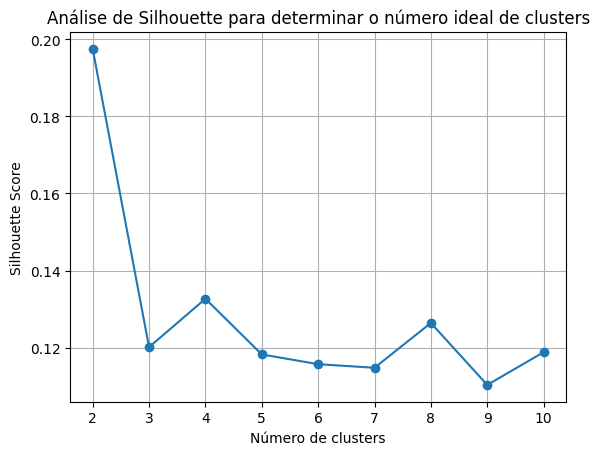

O número ideal de clusters segundo a análise de Silhouette é: 2


In [ ]:
# Definir o intervalo de clusters a testar (de 2 a 10 clusters)
range_n_clusters = range(2, 11)
silhouette_scores = []

# Testar diferentes números de clusters e calcular o Silhouette Score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o modelo K-Means e obter os rótulos dos clusters
    cluster_labels = kmeans.fit_predict(music_standardized)  # Usando o dataset já padronizado

    # Calcular o Silhouette Score para o número de clusters atual
    silhouette_avg = silhouette_score(music_standardized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar os Silhouette Scores para diferentes números de clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Análise de Silhouette para determinar o número ideal de clusters')
plt.grid(True)
plt.show()

# Determinar o número ideal de clusters com base no maior Silhouette Score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"O número ideal de clusters segundo a análise de Silhouette é: {optimal_n_clusters}")

In [ ]:
# Ajustar o modelo K-Means com o número de clusters ideal
kmeans_final = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_final.fit(music_standardized)

# Obter os rótulos dos clusters
labels_final = kmeans_final.labels_

# Calcular novamente o Silhouette Score para validar
silhouette_avg_final = silhouette_score(music_standardized, labels_final)
print(f"Silhouette Score médio para {optimal_n_clusters} clusters: {silhouette_avg_final}")

Silhouette Score médio para 2 clusters: 0.1975039728495378


In [ ]:
# Verificar tamanho do dataset padronizado
print(f"Tamanho do dataframe original: {music.shape}")
print(f"Tamanho do dataframe padronizado: {music_standardized.shape}")
print(f"Número de rótulos dos clusters: {len(labels)}")

Tamanho do dataframe original: (750, 13)
Tamanho do dataframe padronizado: (736, 13)
Número de rótulos dos clusters: 736


In [ ]:
# Ajustar o modelo K-Means com o dataset padronizado
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
kmeans.fit(music_standardized)  # Usando o dataset padronizado

# Obter os rótulos dos clusters
labels = kmeans.labels_
print(f"Número de rótulos de clusters gerados: {len(labels)}")

Número de rótulos de clusters gerados: 736


In [ ]:
# Verificar se o número de rótulos corresponde ao número de amostras no dataset
print(f"Número de amostras no dataset padronizado: {music_standardized.shape[0]}")
print(f"Número de rótulos de clusters: {len(labels)}")

# Certifique-se de que esses dois números sejam iguais
if music_standardized.shape[0] != len(labels):
    print("Erro: O número de rótulos não corresponde ao número de amostras no dataset!")
else:
    print("Tudo certo: O número de rótulos corresponde ao número de amostras no dataset.")

Número de amostras no dataset padronizado: 736
Número de rótulos de clusters: 736
Tudo certo: O número de rótulos corresponde ao número de amostras no dataset.


In [ ]:
# Garantir que o número de linhas seja o mesmo no dataframe e nos rótulos de clusters
print(f"Tamanho do dataframe: {music_standardized.shape}")
print(f"Número de rótulos de clusters: {len(labels)}")
e f
# Verificar se os tamanhos são iguais
if music_standardized.shape[0] != len(labels):
    print("Erro: O número de rótulos não corresponde ao número de linhas do dataframe!")
else:
    # Adicionar os clusters ao dataframe padronizado (music_standardized)
    music_with_clusters = music_standardized.copy()
    music_with_clusters['Cluster'] = labels

    # Verificar se a coluna 'Cluster' foi adicionada corretamente
    print(music_with_clusters.head())

    # Agora, realizar a análise dos clusters
    cluster_analysis = music_with_clusters.groupby('Cluster').mean()
    print(cluster_analysis)

Tamanho do dataframe: (736, 13)
Número de rótulos de clusters: 736
   acousticness  danceability  duration    energy  instrumentalness       key  \
0      1.064424     -0.522062 -1.892076 -0.311042          1.802472  0.861803   
1     -0.490713      0.729058 -0.218646  0.069262         -0.623619 -0.239868   
2     -0.069841      0.203588 -0.035614 -0.580936         -0.622067  0.035550   
3      0.730114      1.329596 -1.626249 -1.537831          1.802472  0.035550   
4      1.571859     -0.828587 -0.728590 -0.564579         -0.548837  0.310967   

   liveness  loudness      mode  speechiness     tempo  time_signature  \
0 -0.583187 -1.636517 -1.677341    -0.582795 -0.021608             0.0   
1  0.546537  0.313593  0.596182    -0.760713  0.133382             0.0   
2 -0.470963 -0.267737  0.596182    -0.799143  0.738259             0.0   
3 -0.044511 -0.691084  0.596182    -0.604145 -0.397486             0.0   
4 -0.903400  0.016880 -1.677341    -0.715166 -1.123285             0.0   

 

In [ ]:
# Verifique se o dataframe original precisa ser filtrado
music_original_filtered = music.loc[music_standardized.index]  # Garantir que o dataframe tenha o mesmo número de linhas

# Verificar se o tamanho do dataframe original filtrado agora corresponde ao número de rótulos de clusters
print(f"Tamanho do dataframe filtrado: {music_original_filtered.shape[0]}")
print(f"Número de rótulos de clusters: {len(labels)}")

# Adicionar os clusters ao dataframe original filtrado
music_original_filtered['Cluster'] = labels

# Analisar as características médias de cada cluster
cluster_analysis = music_original_filtered.groupby('Cluster').mean()

# Exibir a análise de cada cluster
print(cluster_analysis)

Tamanho do dataframe filtrado: 736
Número de rótulos de clusters: 736
         acousticness  danceability       duration    energy  \
Cluster                                                        
0            0.421111      0.590608  217387.409483  0.554716   
1            0.337409      0.598004  220488.713178  0.611814   
2            0.320811      0.603528  216140.719512  0.615878   

         instrumentalness       key  liveness  loudness      mode  \
Cluster                                                             
0                0.001538  4.659483  0.190147 -8.998631  0.728448   
1                0.001379  5.112403  0.185981 -7.937582  0.744186   
2                0.001365  4.743902  0.194878 -7.855628  0.752033   

         speechiness       tempo  time_signature   valence  
Cluster                                                     
0           0.084520  118.165978             4.0  0.488457  
1           0.086550  120.503868             4.0  0.489112  
2           0.08611


Análise das Características de Cada Grupo:
         acousticness  danceability       duration    energy  \
Cluster                                                        
0            0.421111      0.590608  217387.409483  0.554716   
1            0.337409      0.598004  220488.713178  0.611814   
2            0.320811      0.603528  216140.719512  0.615878   

         instrumentalness       key  liveness  loudness      mode  \
Cluster                                                             
0                0.001538  4.659483  0.190147 -8.998631  0.728448   
1                0.001379  5.112403  0.185981 -7.937582  0.744186   
2                0.001365  4.743902  0.194878 -7.855628  0.752033   

         speechiness       tempo  time_signature   valence  
Cluster                                                     
0           0.084520  118.165978             4.0  0.488457  
1           0.086550  120.503868             4.0  0.489112  
2           0.086117  121.513789             

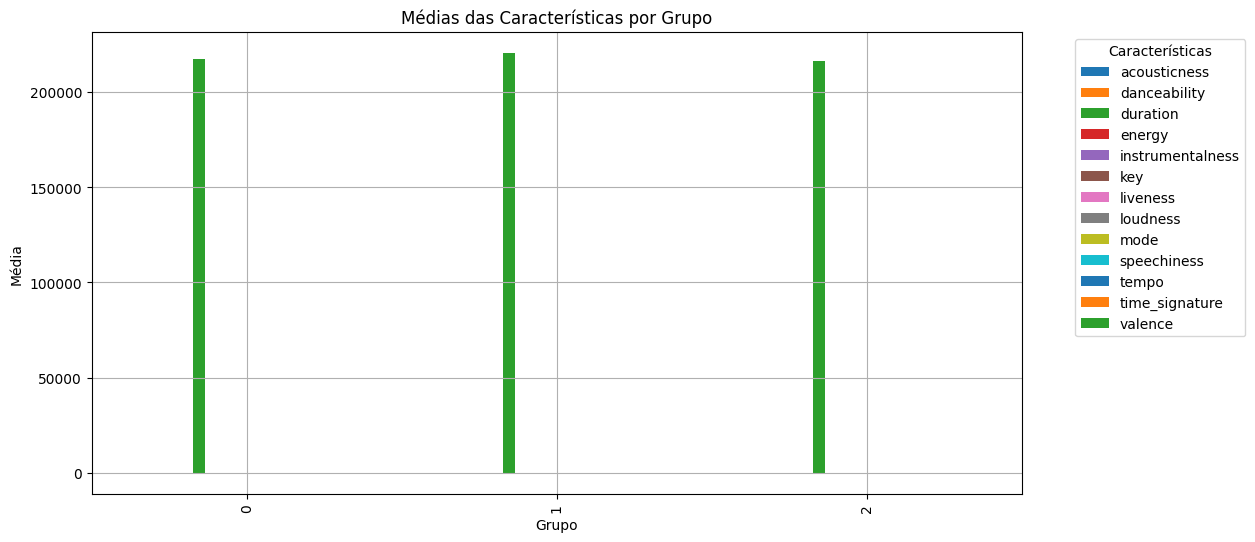

In [ ]:
# Realizar agrupamento
grouped_music = music_original_filtered.groupby('Cluster').mean()  # Médias das características por grupo
print("\nAnálise das Características de Cada Grupo:")
print(grouped_music)

# Visualização das Médias das Características por Grupo
grouped_music.plot(kind='bar', figsize=(12, 6))
plt.title('Médias das Características por Grupo')
plt.ylabel('Média')
plt.xlabel('Grupo')
plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Análise das Características de Cada Grupo para o Subconjunto de Colunas 1 até 5:
         acousticness  danceability       duration    energy  instrumentalness
Cluster                                                                       
0            0.421111      0.590608  217387.409483  0.554716          0.001538
1            0.337409      0.598004  220488.713178  0.611814          0.001379
2            0.320811      0.603528  216140.719512  0.615878          0.001365


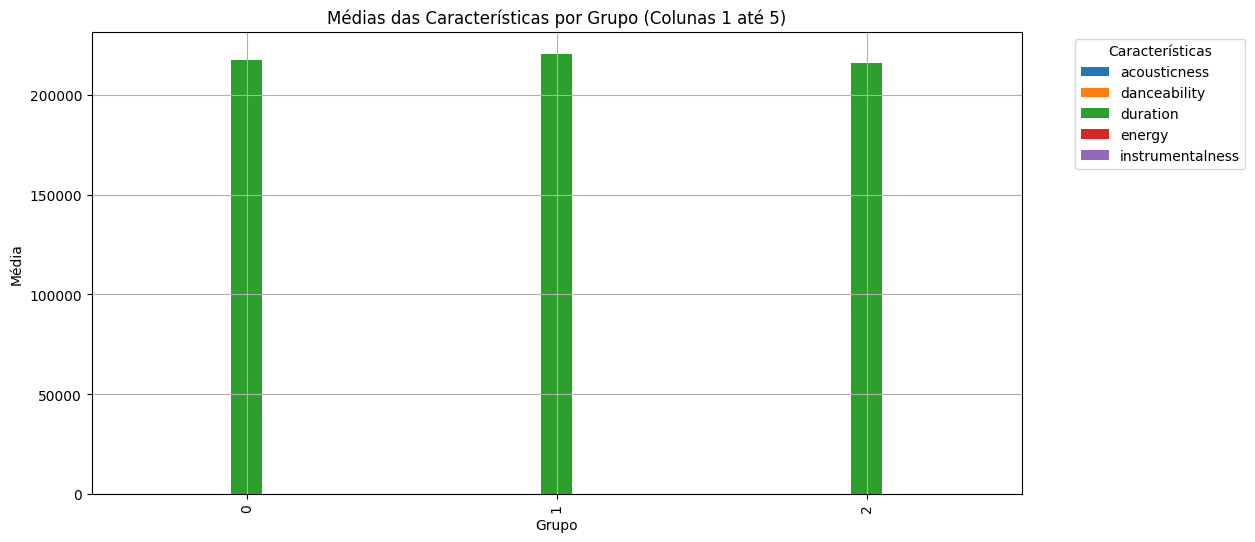


Análise das Características de Cada Grupo para o Subconjunto de Colunas 6 até 10:
              key  liveness  loudness      mode  speechiness
Cluster                                                     
0        4.659483  0.190147 -8.998631  0.728448     0.084520
1        5.112403  0.185981 -7.937582  0.744186     0.086550
2        4.743902  0.194878 -7.855628  0.752033     0.086117


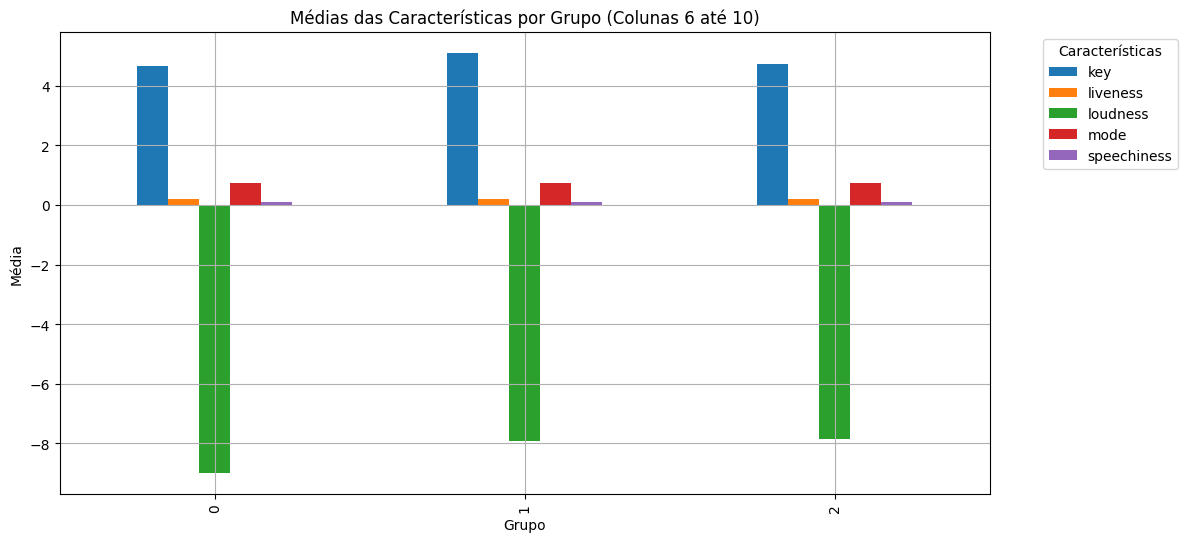


Análise das Características de Cada Grupo para o Subconjunto de Colunas 11 até 15:
              tempo  time_signature   valence  Cluster
Cluster                                               
0        118.165978             4.0  0.488457      0.0
1        120.503868             4.0  0.489112      1.0
2        121.513789             4.0  0.515004      2.0


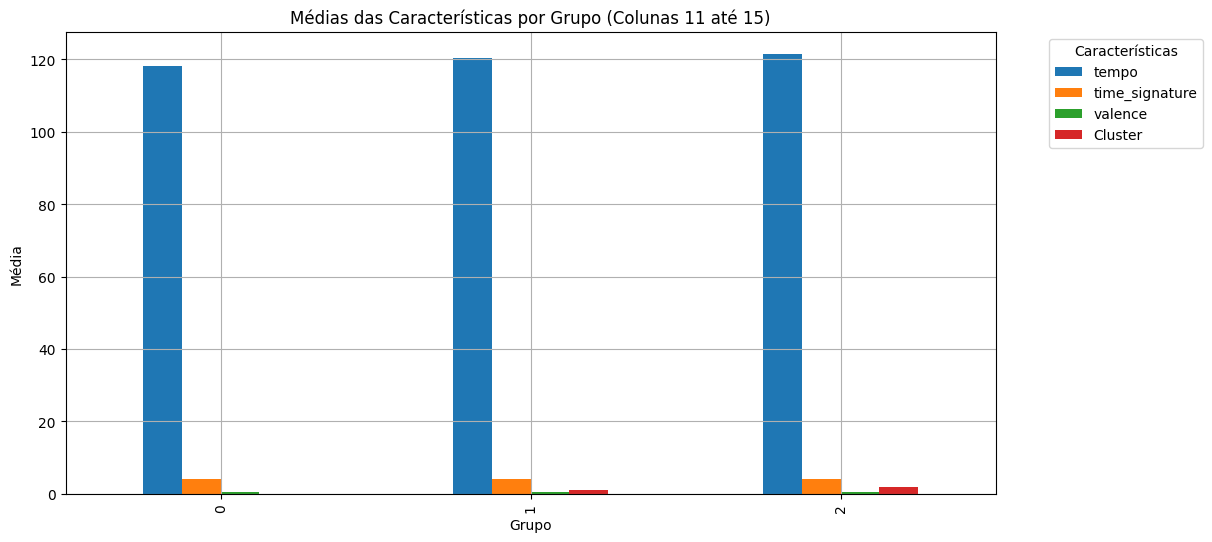

In [ ]:
# Separar as colunas em grupos de 5, por exemplo
num_cols = len(music_original_filtered.columns) - 1  # Descontando a coluna 'Cluster'
step = 5  # Número de colunas por gráfico

for i in range(0, num_cols, step):
    subset_columns = music_original_filtered.columns[i:i+step]

    grouped_subset = music_original_filtered.groupby('Cluster')[subset_columns].mean()
    print(f"\nAnálise das Características de Cada Grupo para o Subconjunto de Colunas {i+1} até {i+step}:")
    print(grouped_subset)

    # Visualizar o gráfico para o subconjunto de colunas
    grouped_subset.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Médias das Características por Grupo (Colunas {i+1} até {i+step})')
    plt.ylabel('Média')
    plt.xlabel('Grupo')
    plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()


Análise das Características de Cada Grupo para o Subconjunto:
         danceability       duration    energy  instrumentalness  speechiness
Cluster                                                                      
0            0.590608  217387.409483  0.554716          0.001538     0.084520
1            0.598004  220488.713178  0.611814          0.001379     0.086550
2            0.603528  216140.719512  0.615878          0.001365     0.086117


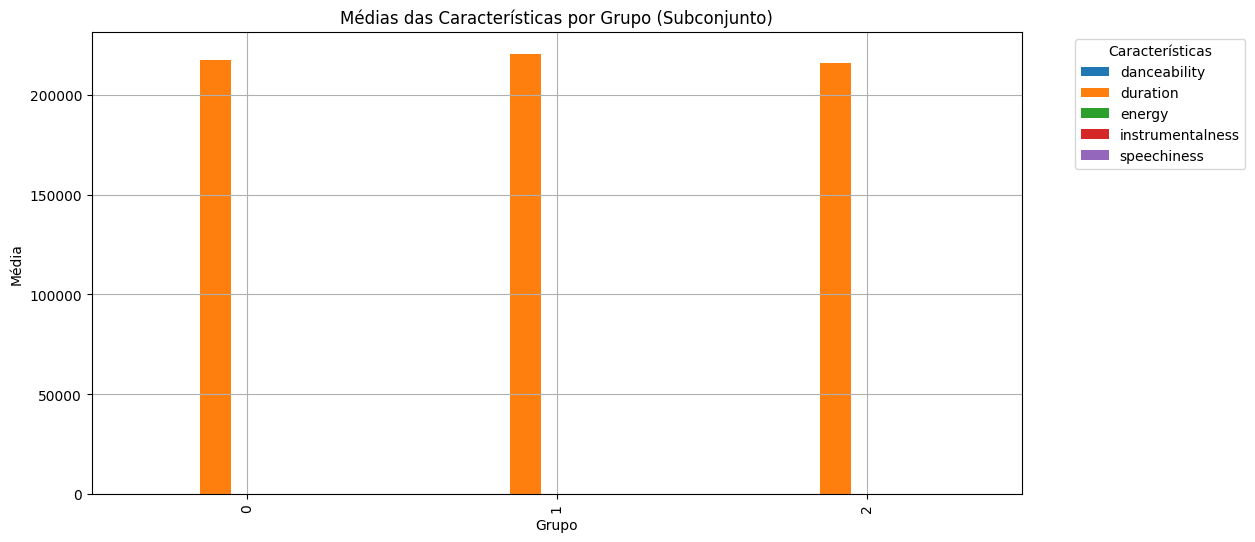

In [ ]:
# Selecionar um subconjunto de colunas, por exemplo, as primeiras 5 colunas numéricas
subset_columns = ['danceability', 'duration', 'energy', 'instrumentalness', 'speechiness']  # Substitua pelos nomes reais das colunas

# Análise das características médias para o subconjunto de colunas
grouped_subset = music_original_filtered.groupby('Cluster')[subset_columns].mean()
print("\nAnálise das Características de Cada Grupo para o Subconjunto:")
print(grouped_subset)

# Visualização das médias para o subconjunto de colunas
grouped_subset.plot(kind='bar', figsize=(12, 6))
plt.title('Médias das Características por Grupo (Subconjunto)')
plt.ylabel('Média')
plt.xlabel('Grupo')
plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

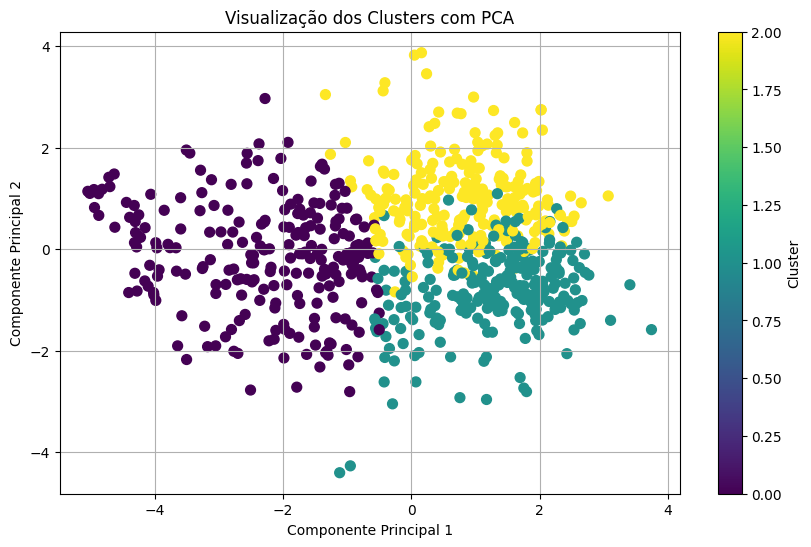

In [ ]:
# Aplicar PCA para reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
pca_components = pca.fit_transform(music_standardized)

# Criar um DataFrame com as componentes principais
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Adicionar a coluna de clusters ao DataFrame com as componentes principais
pca_df['Cluster'] = labels

# Plotar a visualização dos clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

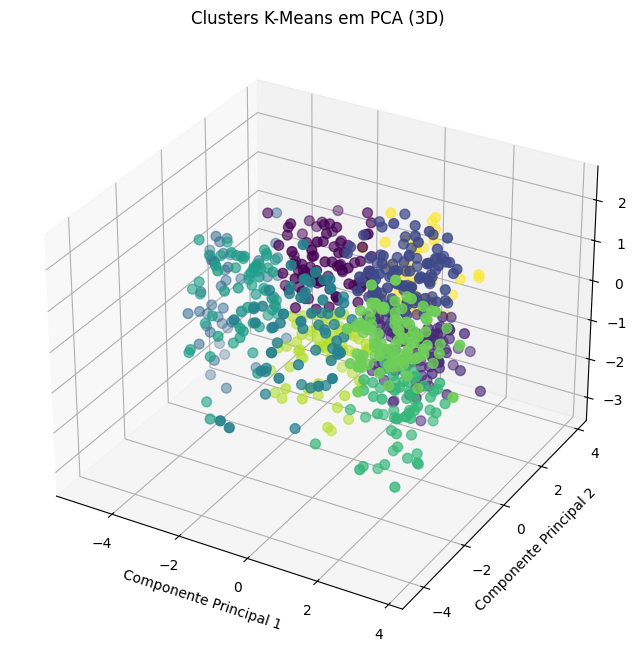

In [ ]:
# Aplicar PCA para reduzir o dataset padronizado para 3 componentes principais
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(music_standardized)

# Criar um DataFrame com as 3 componentes principais
principal_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])

# Aplicar K-Means ao dataset reduzido (3D)
kmeans_3d = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_3d.fit(principal_df_3d)
labels_3d = kmeans_3d.labels_

# Adicionar os rótulos de clusters ao DataFrame
principal_df_3d['Cluster'] = labels_3d

# Visualizar os clusters em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_df_3d['PC1'], principal_df_3d['PC2'], principal_df_3d['PC3'], c=labels_3d, cmap='viridis', s=50)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Clusters K-Means em PCA (3D)')
plt.show()

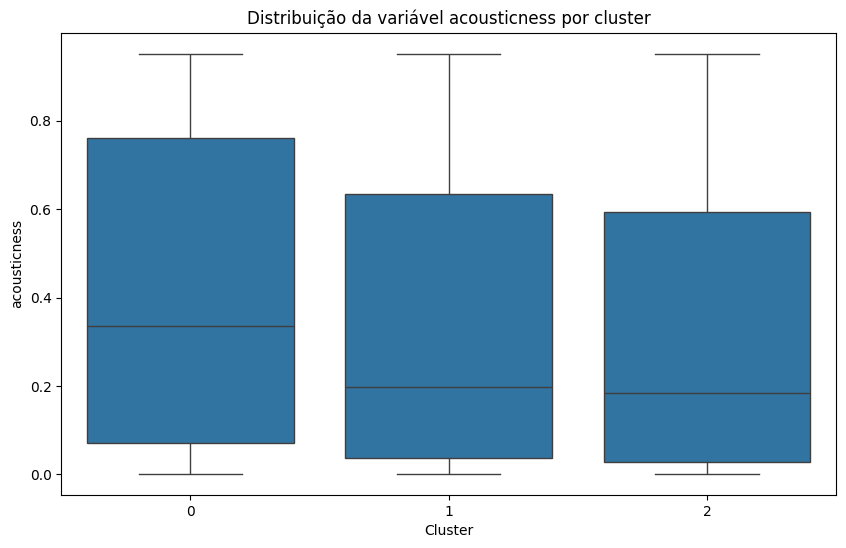

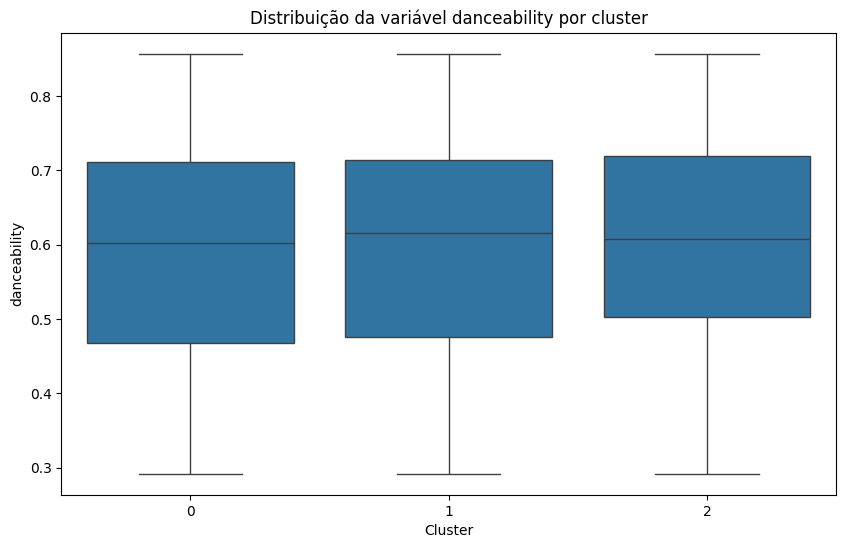

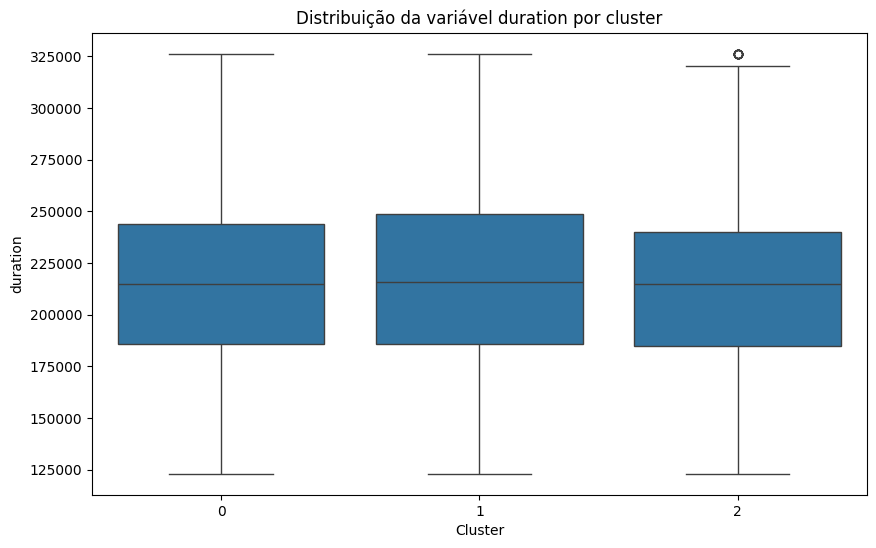

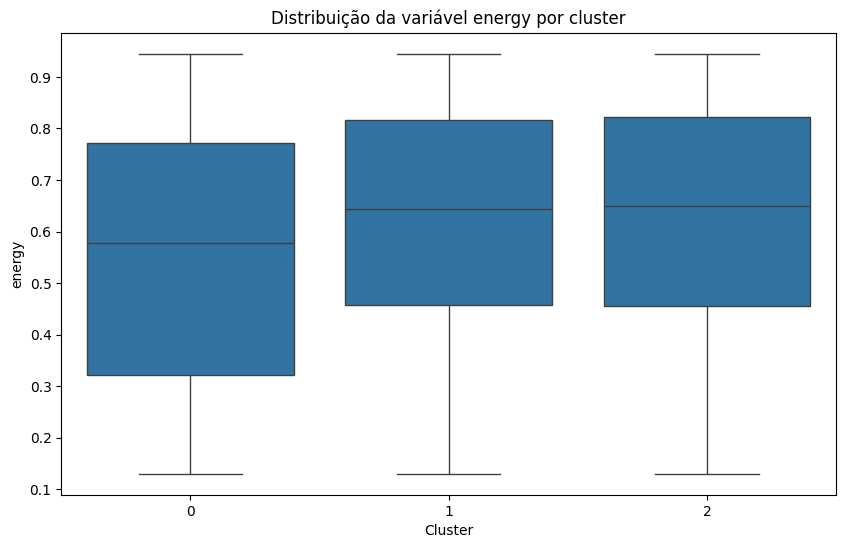

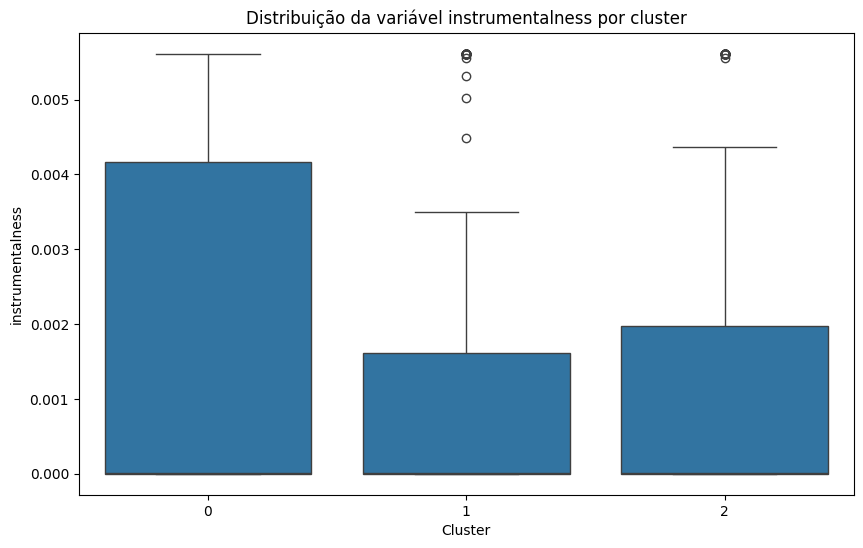

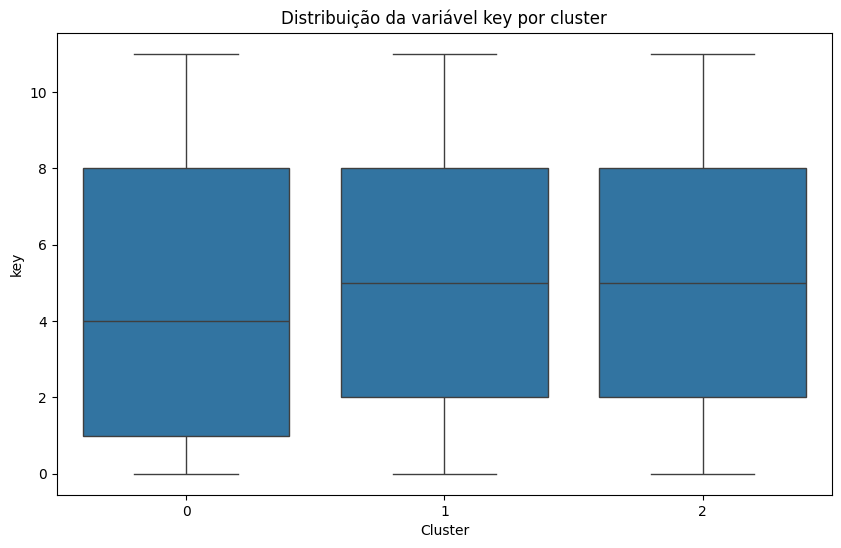

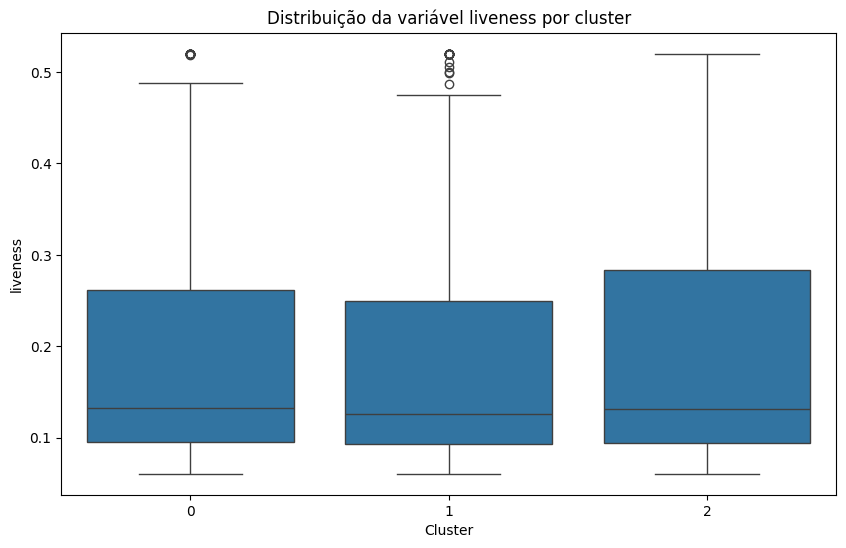

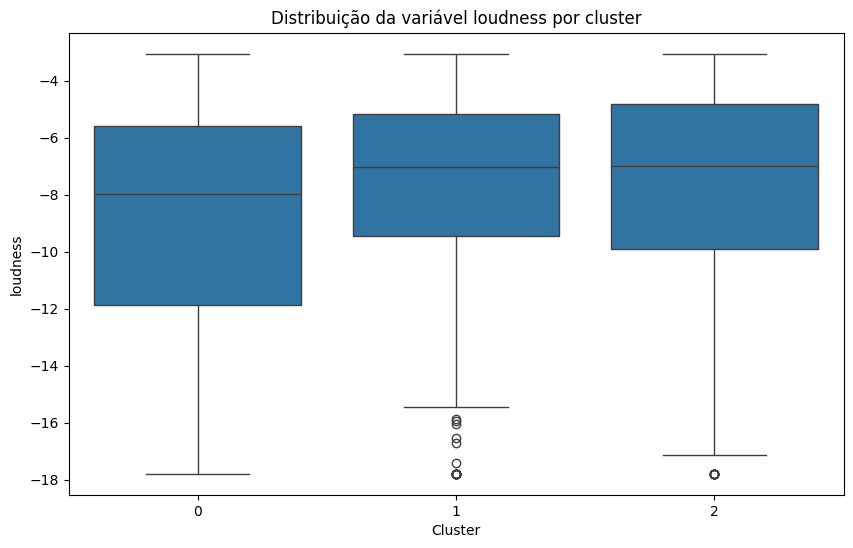

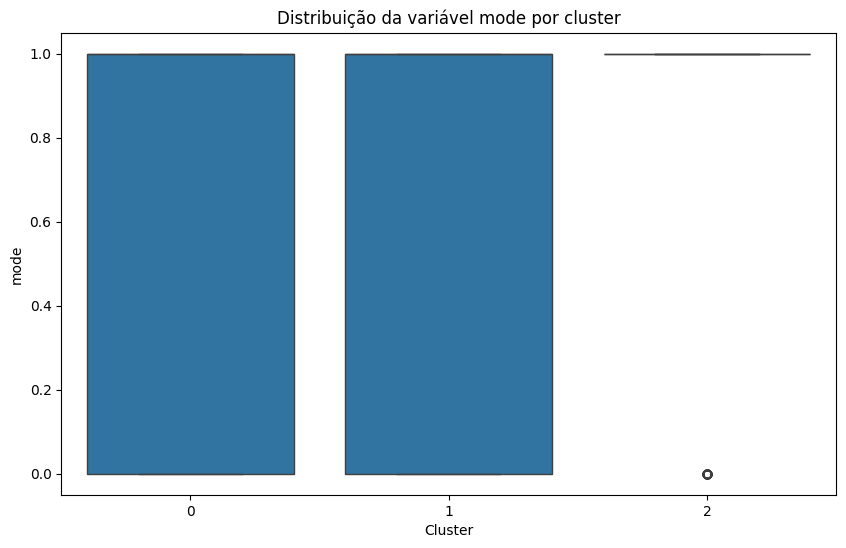

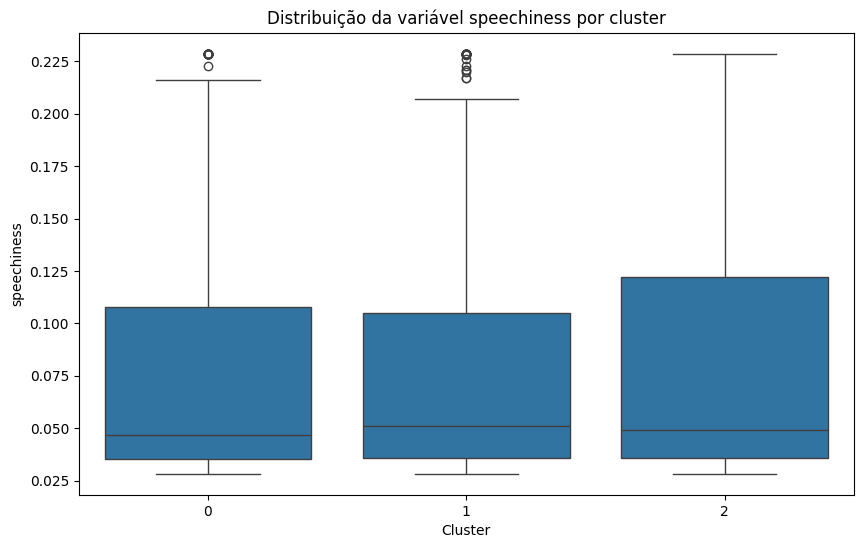

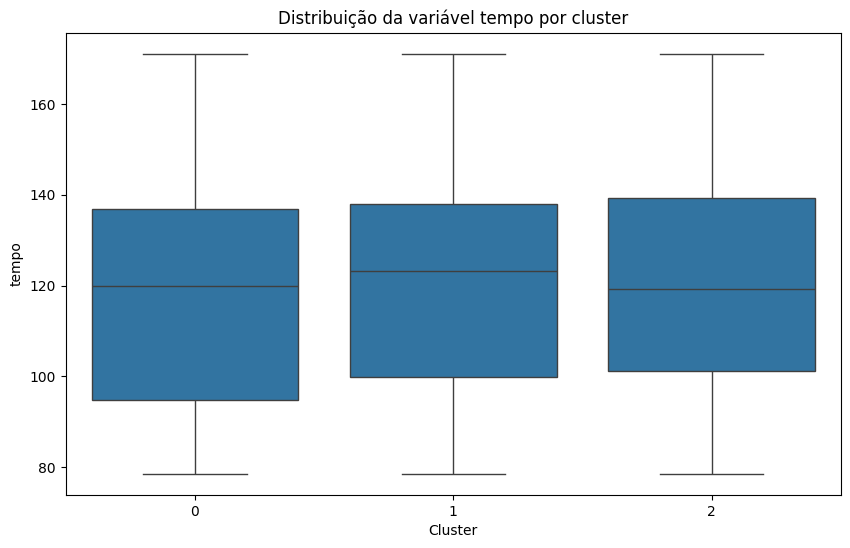

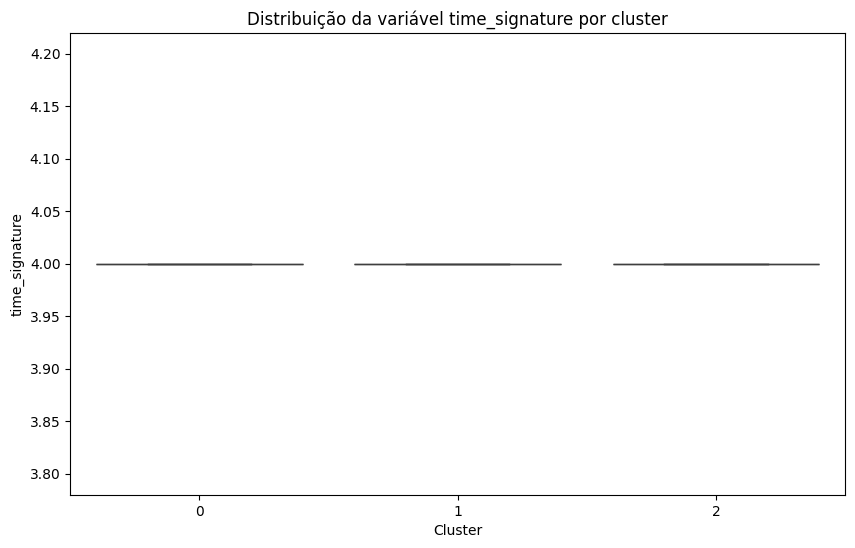

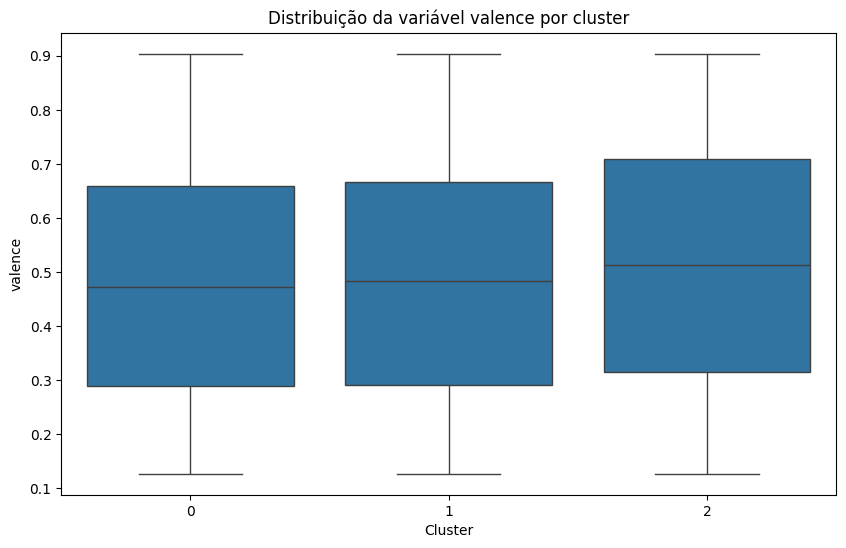

In [ ]:
# Criar uma cópia do dataframe filtrado para evitar modificações diretas
music_with_clusters = music_original_filtered.copy()

# Adicionar a coluna de clusters, se ainda não estiver no dataframe
music_with_clusters['Cluster'] = labels

# Visualizar a distribuição das variáveis numéricas dentro de cada cluster usando boxplots
for col in music_with_clusters.select_dtypes(include=[np.number]).columns:
    if col != 'Cluster':  # Ignorar a coluna de cluster, pois não faz sentido plotá-la
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=col, data=music_with_clusters)
        plt.title(f'Distribuição da variável {col} por cluster')
        plt.show()

In [ ]:
# Calcular as médias de cada característica por cluster
grouped_music = music_original_filtered.groupby('Cluster').mean()

# Calcular as diferenças absolutas entre os clusters
# Exemplo: diferença entre cluster 0 e cluster 1, cluster 0 e cluster 2, cluster 1 e cluster 2
diff_0_1 = abs(grouped_music.loc[0] - grouped_music.loc[1])
diff_0_2 = abs(grouped_music.loc[0] - grouped_music.loc[2])
diff_1_2 = abs(grouped_music.loc[1] - grouped_music.loc[2])

# Juntar as diferenças em um DataFrame para fácil visualização
diff_df = pd.DataFrame({'Diff_0_1': diff_0_1, 'Diff_0_2': diff_0_2, 'Diff_1_2': diff_1_2})

# Ordenar as diferenças para ver quais características têm maior variação entre clusters
diff_df_sorted = diff_df.sort_values(by='Diff_0_1', ascending=False)

# Exibir as maiores diferenças
print("Diferenças absolutas entre os clusters (ordenadas):")
print(diff_df_sorted.head(10))  # Exibir as 10 maiores diferenças


Diferenças absolutas entre os clusters (ordenadas):
                 Diff_0_1     Diff_0_2     Diff_1_2
duration      3101.303696  1246.689971  4347.993666
tempo            2.337890     3.347810     1.009920
loudness         1.061050     1.143003     0.081954
key              0.452920     0.084420     0.368501
acousticness     0.083703     0.100300     0.016598
energy           0.057098     0.061163     0.004064
mode             0.015738     0.023584     0.007846
danceability     0.007396     0.012921     0.005525
liveness         0.004166     0.004731     0.008897
speechiness      0.002030     0.001597     0.000433


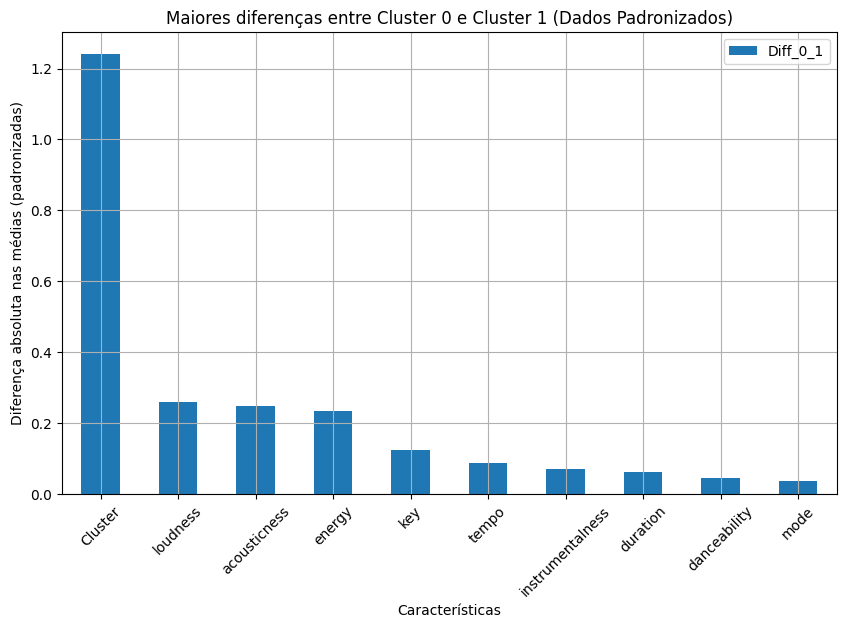

In [ ]:
# Padronizar o dataframe numérico
scaler = StandardScaler()
music_scaled = pd.DataFrame(scaler.fit_transform(music_original_filtered.select_dtypes(include=[np.number])), columns=music_original_filtered.select_dtypes(include=[np.number]).columns)

# Agora podemos aplicar o mesmo processo de clusterização e cálculo de diferenças
grouped_music_scaled = music_scaled.groupby(music_original_filtered['Cluster']).mean()

# Repetir o cálculo das diferenças
diff_0_1_scaled = abs(grouped_music_scaled.loc[0] - grouped_music_scaled.loc[1])
diff_0_2_scaled = abs(grouped_music_scaled.loc[0] - grouped_music_scaled.loc[2])
diff_1_2_scaled = abs(grouped_music_scaled.loc[1] - grouped_music_scaled.loc[2])

# Juntar as diferenças padronizadas em um DataFrame para fácil visualização
diff_df_scaled = pd.DataFrame({'Diff_0_1': diff_0_1_scaled, 'Diff_0_2': diff_0_2_scaled, 'Diff_1_2': diff_1_2_scaled})

# Ordenar as diferenças
diff_df_scaled_sorted = diff_df_scaled.sort_values(by='Diff_0_1', ascending=False)

# Visualizar novamente as diferenças entre os clusters
diff_df_scaled_sorted[['Diff_0_1']].head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Maiores diferenças entre Cluster 0 e Cluster 1 (Dados Padronizados)')
plt.ylabel('Diferença absoluta nas médias (padronizadas)')
plt.xlabel('Características')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


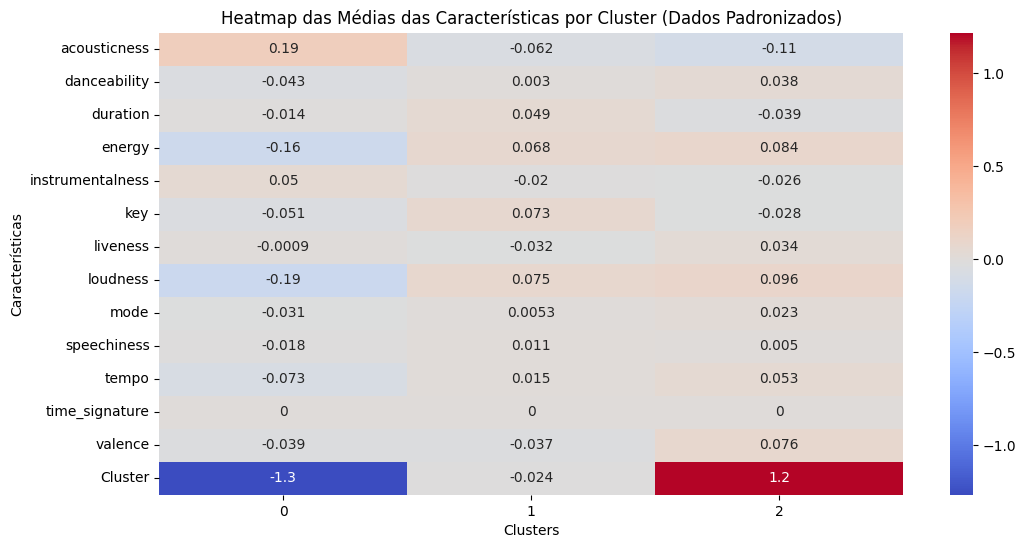

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_music_scaled.T, annot=True, cmap='coolwarm')
plt.title('Heatmap das Médias das Características por Cluster (Dados Padronizados)')
plt.ylabel('Características')
plt.xlabel('Clusters')
plt.show()

In [ ]:
db_score = davies_bouldin_score(music_scaled, music_original_filtered['Cluster'])
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 5.234418574061615
